<a href="https://colab.research.google.com/github/patelruday/Machine_learning/blob/main/Customer_Segmentation_and_recommendation_online_retailer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"OM NAMO BHAGVATE VASUDEVAY"

Project: Customer_Segmentation_and_reommendation for online reatailer

In this project, we delve deep into the thriving sector of online retail by analyzing a transactional dataset from a UK-based retailer, available at the UCI Machine Learning Repository. This dataset documents all transactions between 2010 and 2011. Our primary objective is to amplify the efficiency of marketing strategies and boost sales through customer segmentation. We aim to transform the transactional data into a customer-centric dataset by creating new features that will facilitate the segmentation of customers into distinct groups using the K-means clustering algorithm. This segmentation will allow us to understand the distinct profiles and preferences of different customer groups. Building upon this, we intend to develop a recommendation system that will suggest top-selling products to customers within each segment who haven't purchased those items yet, ultimately enhancing marketing efficacy and fostering increased sales.

Objectives:
1.
Data Cleaning & Transformation: Clean the dataset by handling missing values, duplicates, and outliers, preparing it for effective clustering
.2.
Feature Engineering: Develop new features based on the transactional data to create a customer-centric dataset, setting the foundation for customer segmentatio
n3..
Data Preprocessing: Undertake feature scaling and dimensionality reduction to streamline the data, enhancing the efficiency of the clustering proce

4.Customer Segmentation using K-Means Clustering: Segment customers into distinct groups using K-means, facilitating targeted marketing and personalized strategies.

5.
Cluster Analysis & Evaluation: Analyze and profile each cluster to develop targeted marketing strategies and assess the quality of the clusters formed
.6.
Recommendation System: Implement a system to recommend best-selling products to customers within the same cluster who haven't purchased those products, aiming to boost sales and marketing effectiveness.ss.

In [ ]:
!pip install yellowbrick


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter
%matplotlib inline


In [ ]:
# Initialize Plotly for use in the notebook
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [ ]:
data=pd.read_csv(r"E:\uday\Customer_segmentation_and_recommendation\data.csv",encoding="ISO-8859-1")

In [ ]:
data.shape

(541909, 8)

In [ ]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

Dataset Description:
Variable	Description
InvoiceNo	Code representing each unique transaction. If this code starts with letter 'c', it indicates a cancellation.
StockCode	Code uniquely assigned to each distinct product.
Description	Description of each product.
Quantity	The number of units of a product in a transaction.
InvoiceDate	The date and time of the transaction.
UnitPrice	The unit price of the product in sterling.
CustomerID	Identifier uniquely assigned to each customer.
Country	The country of the customer.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
data.describe(include='object')

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


Inferences:
Quantity.
The average quantity of products in a transaction is approximately 9....
The quantity has a wide range, with a minimum value of -80995 and a maximum value of 80995. The negative values indicate returned or cancelled orders, which need to be handled approprily..y.
The standard deviation is quite large, indicating a significant spread in the data. The presence of outliers is indicated by a large difference between the maximum and the 75th percentile val

UnitPri
1.
The average unit price of the products is approximately 41.2.
The unit price also shows a wide range, from -11062.06 to 38970, which suggests the presence of errors or noise in the data, as negative prices don't make .se3..
Similar to the Quantity column, the presence of outliers is indicated by a large difference between the maximum and the 75th percentile valu

CustomD:
1.
There are 406829 non-null entries, indicating missing values in the dataset which need to be addr
sed.2.
The Customer IDs range from 12346 to 18287, helping in identifying unique cu
stomers
InvoNo:
1.
There are 25900 unique invoice numbers, indicating 25900 separate transaions.2.
The most frequent invoice number is 573585, appearing 1114 times, possibly representing a large transaction or an order with multiple item

Stoode:
1.
There are 4070 unique stock codes representing different pducts.2.
The most frequent stock code is 85123A, appearing 2313 times in the

 dataset.Desction:
1.
There are 4223 unique product descptions.2.
The most frequent product description is "WHITE HANGING HEART T-LIGHT HOLDER", appearing .9 times3..
There are some missing values in this column which need to be treat

Country:
The transactions come from 38 different countries, with a dominant majority of the transactions (approximately 91.4%) originating from the Unit
s..
es.
ues.

In [ ]:
data[data['InvoiceNo']=='573585']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
430237,573585,11001,ASSTD DESIGN RACING CAR PEN,2,10/31/2011 14:41,3.29,NaN,United Kingdom
430238,573585,15036,ASSORTED COLOURS SILK FAN,15,10/31/2011 14:41,1.63,NaN,United Kingdom
430239,573585,15039,SANDALWOOD FAN,15,10/31/2011 14:41,1.63,NaN,United Kingdom
430240,573585,15056BL,EDWARDIAN PARASOL BLACK,1,10/31/2011 14:41,12.46,NaN,United Kingdom
430241,573585,15056N,EDWARDIAN PARASOL NATURAL,1,10/31/2011 14:41,12.46,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
431346,573585,90209C,PINK ENAMEL+GLASS HAIR COMB,3,10/31/2011 14:41,2.07,NaN,United Kingdom
431347,573585,90214S,"LETTER ""S"" BLING KEY RING",1,10/31/2011 14:41,0.83,NaN,United Kingdom
431348,573585,DOT,DOTCOM POSTAGE,1,10/31/2011 14:41,2019.05,NaN,United Kingdom
431349,573585,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,10/31/2011 14:41,16.67,NaN,United Kingdom


Handling Missing values

In [ ]:
missing_data=data.isnull().sum()
missing_data

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
missing_data_percent=(missing_data[missing_data>0]/data.shape[0])*100

In [ ]:
missing_data_percent

Description     0.268311
CustomerID     24.926694
dtype: float64

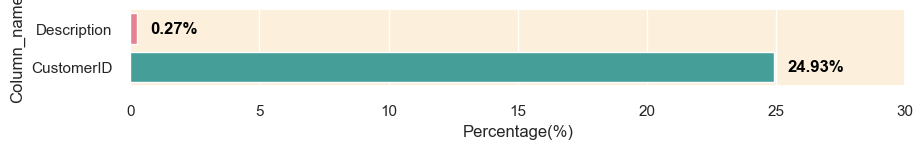

In [ ]:
fig,ax=plt.subplots(figsize=(10,1))
sns.barplot(y=missing_data_percent.index,x=missing_data_percent.values,hue=missing_data_percent.index,orient='horizontal',ax=ax)
# Annotate the values and indexes
for i, (value, name) in enumerate(zip(missing_data_percent, missing_data_percent.index)):
    ax.text(value+.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=12, color='black')
ax.set_xlim([0,30])
ax.set_xlabel('Percentage(%)')
ax.set_ylabel('Column_name')
plt.show()

Handling Missing Values Strategy:
CustomerID (24.93% missing values)

The CustomerID column contains nearly a quarter of missing data. This column is essential for clustering customers and creating a recommendation system. Imputing such a large percentage of missing values might introduce significant bias or noise into the analys...

Moreover, since the clustering is based on customer behavior and preferences, it's crucial to have accurate data on customer identifiers. Therefore, removing the rows with missing CustomerIDs seems to be the most reasonable approach to maintain the integrity of the clusters and the ana

Description (0.27% missing valu)
1.
The Description column has a minor percentage of missing values. However, it has been noticed that there are inconsistencies in the data where the same StockCode does not always have the same Description. This indicates data quality issues and potential errors in the product descripon

2.Given these inconsistencies, imputing the missing descriptions based on StockCode might not be reliable. Moreover, since the missing percentage is quite low, it would be prudent to remove the rows with missing Descriptions to avoid propagating errors and inconsistencies into the subsequent analyses.

By removing rows with missing values in the CustomerID and Description columns, we aim to construct a cleaner and more reliable dataset, which is essential for achieving accurate clustering and creating an effective recommendation system.s.ses.ysis.

Removing null values

In [ ]:
data=data.dropna(subset=['Description','CustomerID']).reset_index(drop=True)

In [ ]:
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
data.shape

(406829, 8)

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Handling duplicates

In [ ]:
data.duplicated().sum()

5225

In [ ]:
#Drop duplicate values
data=data.drop_duplicates().reset_index(drop=True)

In [ ]:
data.shape

(401604, 8)

Treating cancelled transactions
To refine our understanding of customer behavior and preferences, we need to take into account the transactions that were cancelled. Initially, we will identify these transactions by filtering the rows where the InvoiceNo starts with "C". Subsequently, we will analyze these rows to understand their common characteristics or patterns:

In [ ]:
# filter all invoices starts with 'c' or'C' and create a new column 'transaction_status'
data['transaction_status']=np.where(data['InvoiceNo'].astype(str).str.startswith(('c','C')),'cancelled','completed')

In [ ]:
cancelled_transactions=data[data['transaction_status']=='cancelled']
cancelled_transactions.describe()

,Quantity,UnitPrice,CustomerID
count,8872.000000,8872.000000,8872.000000
mean,-30.774910,18.899512,14990.152953
std,1172.249902,445.190864,1708.230387
min,-80995.000000,0.010000,12346.000000
25%,-6.000000,1.450000,13505.000000
50%,-2.000000,2.950000,14868.000000
75%,-1.000000,4.950000,16393.000000
max,-1.000000,38970.000000,18282.000000


Inferences from the Cancelled Transactions Data:
All quantities in the cancelled transactions are negative, indicating that these are indeed orders that were cancelled.2.
The UnitPrice column has a considerable spread, showing that a variety of products, from low to high value, were part of the cancelled transactios.n.

Strategy for Handling Cancelled Transactions:
Considering the project's objective to cluster customers based on their purchasing behavior and preferences and to eventually create a recommendation system, it's imperative to understand the cancellation patterns of customers. Therefore, the strategy is to retain these cancelled transactions in the dataset, marking them distinctly to facilitate further analysis. This approach will:

Enhance the clustering process by incorporating patterns and trends observed in cancellation data, which might represent certain customer behaviors or preferencs.
.
Allow the recommendation system to possibly prevent suggesting products that have a high likelihood of being cancelled, thereby improving the quality of recommendations.

In [ ]:
cancelled_percentage=(cancelled_transactions.shape[0]/data.shape[0])*100
print(f"cancelled percentage is {cancelled_percentage:.2f}%")

cancelled percentage is 2.21%


Correcting Stockcode anomalies

In [ ]:
data['StockCode'].nunique()
# there are 3684 unique stockcodes

3684

In [ ]:
data['StockCode'].value_counts()

StockCode
85123A    2065
22423     1894
85099B    1659
47566     1409
84879     1405
          ... 
90104        1
90135        1
90027D       1
90027A       1
84746        1
Name: count, Length: 3684, dtype: int64

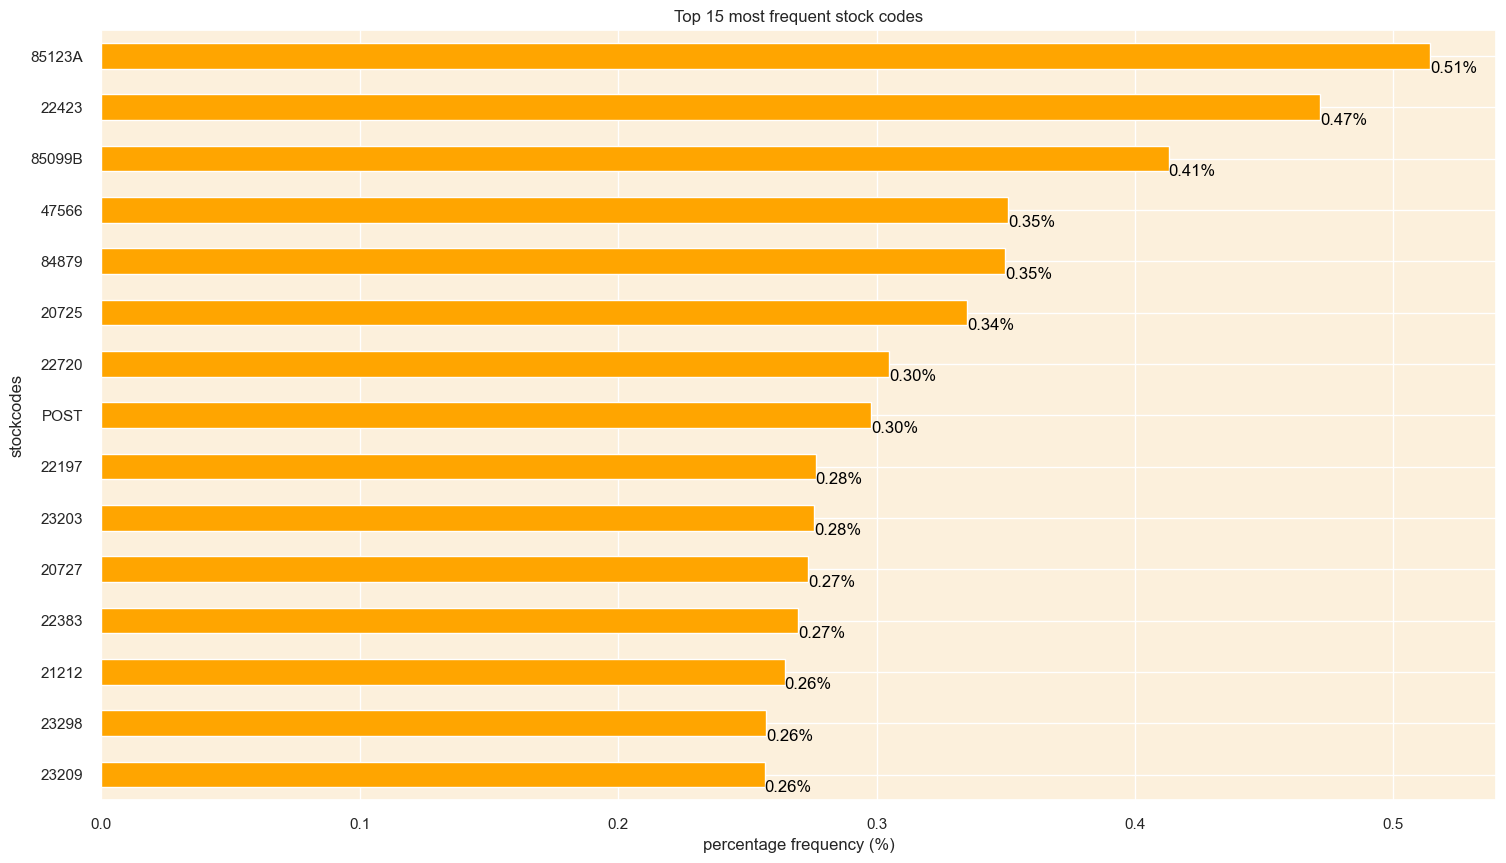

In [ ]:
# find top 15 stockcodes
top_15_stockcode=(data['StockCode'].value_counts(normalize=True)[:15])*100
#ploting top_15 stockcodes
plt.figure(figsize=(18,10))
top_15_stockcode.plot(kind='barh',color='orange')
#adding the percentage frequency on the bars
for index,value in enumerate(top_15_stockcode):
    plt.text(value,index+.25,f"{value:.2f}%",fontsize=12,ha='left',va='center',color='black')
plt.title("Top 15 most frequent stock codes")
plt.xlabel('percentage frequency (%)')
plt.ylabel('stockcodes')
plt.gca().invert_yaxis()
plt.show()

Inferences on Stock Codes:
1.
Product Variety: The dataset contains 3684 unique stock codes, indicating a substantial variety of products available in the online retail store. This diversity can potentially lead to the identification of distinct customer clusters, with preferences for different types of products
.2.
Popular Items: A closer look at the top 10 most frequent stock codes can offer insights into the popular products or categories that are frequently purchased by customer

3.Stock Code Anomalies: We observe that while most stock codes are composed of 5 or 6 characters, there are some anomalies like the code 'POST'. These anomalies might represent services or non-product transactions (perhaps postage fees) rather than actual products.

To maintain the focus of the project, which is clustering based on product purchases and creating a recommendation system, these anomalies should be further investigated and possibly treated appropriately to ensure data integrity.s.

To delve deeper into identifying these anomalies, let's explore the frequency of the number of numeric characters in the stock codes, which can provide insights into the nature of these unusual entries:

In [ ]:
# Finding the number of numeric characters in each unique stock code
unique_stock_codes = data['StockCode'].unique()
numeric_char_counts_in_unique_codes = pd.Series(unique_stock_codes).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts()

In [ ]:

# Printing the value counts for unique stock codes
print("Value counts of numeric character frequencies in unique stock codes:")
print("-"*70)
print(numeric_char_counts_in_unique_codes)

Value counts of numeric character frequencies in unique stock codes:
----------------------------------------------------------------------
5    3676
0       7
1       1
Name: count, dtype: int64


Inference:
The output indicates the following:
1.

A majority of the unique stock codes (3676 out of 3684) contain exactly 5 numeric characters, which seems to be the standard format for representing product codes in this datase2.t.
There are a few anomalies: 7 stock codes contain no numeric characters and 1 stock code contains only 1 numeric character. These are clearly deviating from the standard format and need further investigation to understand their nature and whether they represent valid product transacti
Now, let's identify the stock codes that contain 0 or 1 numeric characters to further understand these anomalies:ons.

In [ ]:
# Finding and printing the stock codes with 0 and 1 numeric characters
anomalous_stock_codes = [code for code in unique_stock_codes if sum(c.isdigit() for c in str(code)) in (0, 1)]

# Printing each stock code on a new line
print("Anomalous stock codes:")
print("-"*22)
for code in anomalous_stock_codes:
    print(code)

Anomalous stock codes:
----------------------
POST
D
C2
M
BANK CHARGES
PADS
DOT
CRUK


In [ ]:
# Calculating the percentage of records with these stock codes
percentage_anomalous = (data['StockCode'].isin(anomalous_stock_codes).sum() / len(data)) * 100

# Printing the percentage
print(f"The percentage of records with anomalous stock codes in the dataset is: {percentage_anomalous:.2f}%")

The percentage of records with anomalous stock codes in the dataset is: 0.48%


Inference:
Based on the analysis, we find that a very small proportion of the records, 0.48%, have anomalous stock codes, which deviate from the typical format observed in the majority of the data. Also, these anomalous codes are just a fraction among all unique stock codes (only 8 out of 3684).

These codes seem to represent non-product transactions like "BANK CHARGES", "POST" (possibly postage fees), etc. Since they do not represent actual products and are a very small proportion of the dataset, including them in the analysis might introduce noise and distort the clustering and recommendation system.

Strategy:
Given the context of the project, where the aim is to cluster customers based on their product purchasing behaviors and develop a product recommendation system, it would be prudent to exclude these records with anomalous stock codes from the dataset. This way, the focus remains strictly on genuine product transactions, which would lead to a more accurate and meaningful analysis.

Thus, the strategy would be to filter out and remove rows with these anomalous stock codes from the dataset before proceeding with further analysis and model development:

In [ ]:
# Removing rows with anomalous stock codes from the dataset
data = data[~data['StockCode'].isin(anomalous_stock_codes)]

In [ ]:
data.shape

(399689, 9)

Cleaning description column

First, I will calculate the occurrence count of each unique description in the dataset. Then, I will plot the top 30 descriptions. This visualization will give a clear view of the highest occurring descriptions in the dataset:

In [ ]:
# no of unique values in description
len(data['Description'].unique())

3888

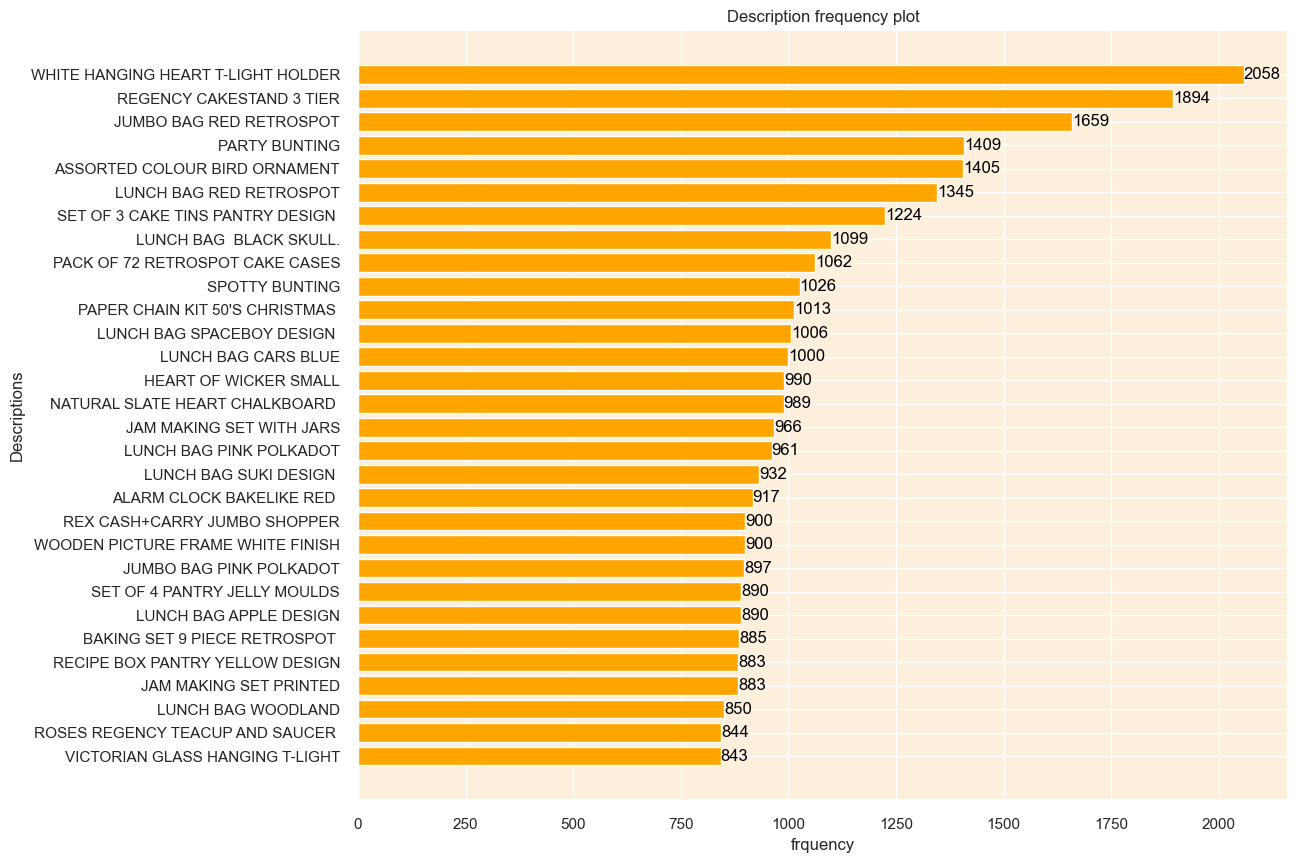

In [ ]:
top_30_des=data['Description'].value_counts()[:30]
plt.figure(figsize=(12,10))
plt.barh(top_30_des.index,top_30_des.values,color='orange')
for index, value in enumerate(top_30_des):
    plt.text(value,index,f"{value}",ha='left',va='center',color='black')
plt.title('Description frequency plot')
plt.xlabel('frquency')
plt.ylabel('Descriptions')
plt.gca().invert_yaxis()
plt.show()


Inferences on Descriptions:
The most frequent descriptions are generally household items, particularly those associated with kitchenware, lunch bags, and decorative items.
Interestingly, all the descriptions are in uppercase, which might be a standardized format for entering product descriptions in the database. However, considering the inconsistencies and anomalies encountered in the dataset so far, it would be prudent to check if there are descriptions entered in lowercase or a mix of case styles.

In [ ]:
#Find unique descriptions containing lowercase characters
lowercase_des=[desc for desc in data['Description'].unique() if any(char.islower() for char in desc)]
print("The uniqe descriptions containing lower case are : ")
print("-"*80)
for des in lowercase_des:
    print(des)

The uniqe descriptions containing lower case are : 
--------------------------------------------------------------------------------
BAG 500g SWIRLY MARBLES
POLYESTER FILLER PAD 45x45cm
POLYESTER FILLER PAD 45x30cm
POLYESTER FILLER PAD 40x40cm
FRENCH BLUE METAL DOOR SIGN No
BAG 250g SWIRLY MARBLES
BAG 125g SWIRLY MARBLES
3 TRADITIONAl BISCUIT CUTTERS  SET
NUMBER TILE COTTAGE GARDEN No
FOLK ART GREETING CARD,pack/12
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
POLYESTER FILLER PAD 65CMx65CM
NUMBER TILE VINTAGE FONT No 
POLYESTER FILLER PAD 30CMx30CM
POLYESTER FILLER PAD 60x40cm
FLOWERS HANDBAG blue and orange
Next Day Carriage
THE KING GIFT BAG 25x24x12cm
High Resolution Image


Inference:
Upon reviewing the descriptions that contain lowercase characters, it is evident that some entries are not product descriptions, such as "Next Day Carriage" and "High Resolution Image". These entries seem to be unrelated to the actual products and might represent other types of information or service details.

Strategy:
Step 1: Remove the rows where the descriptions contain service-related information like "Next Day Carriage" and "High Resolution Image", as these do not represent actual products and would not contribute to the clustering and recommendation system we aim to build.
Step 2: For the remaining descriptions with mixed case, standardize the text to uppercase to maintain uniformity across the dataset. This will also assist in reducing the chances of having duplicate entries with different case styles.
By implementing the above strategy, we can enhance the quality of our dataset, making it more suitable for the analysis and modeling phases of our project.

In [ ]:
service_descriptions=['Next Day Carriage','High Resolution Image']
percentage_service_descriptions=(data[data['Description'].isin(service_descriptions)].shape[0]/data.shape[0])*100
print(f"Percentage of recods with service related description in dataset is {percentage_service_descriptions:.2f}%")

Percentage of recods with service related description in dataset is 0.02%


In [ ]:
# remove rows with service related descriptions
data=data[~data['Description'].isin(service_descriptions)]

In [ ]:
# Standerdize the text to uppercase to maintain the uniformity in yhe dataset
data['Description']=data['Description'].str.upper()

Treating Zero Unitprices

In [ ]:
data['UnitPrice'].describe()

count    399606.000000
mean          2.904957
std           4.448796
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

Inference:
The minimum unit price value is zero. This suggests that there are some transactions where the unit price is zero, potentially indicating a free item or a data entry error. To understand their nature, it is essential to investigate these zero unit price transactions further. A detailed analysis of the product descriptions associated with zero unit prices will be conducted to determine if they adhere to a specific pattern:

In [ ]:
data[data['UnitPrice']==0].describe()[['Quantity']]

,Quantity
count,33.000000
mean,420.515152
std,2176.713608
min,1.000000
25%,2.000000
50%,11.000000
75%,36.000000
max,12540.000000


Inferences on UnitPrice:
The transactions with a unit price of zero are relatively few in number (33 transactions).
These transactions have a large variability in the quantity of items involved, ranging from 1 to 12540, with a substantial standard deviation.
Including these transactions in the clustering analysis might introduce noise and could potentially distort the customer behavior patterns identified by the clustering algorithm.

Strategy:
Given the small number of these transactions and their potential to introduce noise in the data analysis, the strategy should be to remove these transactions from the dataset. This would help in maintaining a cleaner and more consistent dataset, which is essential for building an accurate and reliable clustering model and recommendation system.

In [ ]:
# remove the recods with unit price zero
data=data[data['UnitPrice']>0]

In [ ]:
data['UnitPrice'].describe()

count    399573.000000
mean          2.905197
std           4.448902
min           0.030000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

In [ ]:
# resetting the cleaned data index
data.reset_index(drop=True,inplace=True)

In [ ]:
data.shape

(399573, 9)

In [ ]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'transaction_status'],
      dtype='object')

In [ ]:
data1=data.copy()

Feature Engineering

In order to create a comprehensive customer-centric dataset for clustering and recommendation, the following features can be engineered from the available data:

RFM Features
RFM is a method used for analyzing customer value and segmenting the customer base. It is an acronym that stands for:
1.Recency (R): This metric indicates how recently a customer has made a purchase. A lower recency value means the customer has purchased more recently, indicating higher engagement with the brand.
2.
Frequency (F): This metric signifies how often a customer makes a purchase within a certain period. A higher frequency value indicates a customer who interacts with the business more often, suggesting higher loyalty or satisfaction.3.
Monetary (M): This metric represents the total amount of money a customer has spent over a certain period. Customers who have a higher monetary value have contributed more to the business, indicating their potential high lifetime valu

Together, these metrics help in understanding a customer's buying behavior and preferences, which is pivotal in personalizing marketing strategies and creating a recommendation system.  

Recency(R)
In this step, we focus on understanding how recently a customer has made a purchase. This is a crucial aspect of customer segmentation as it helps in identifying the engagement level of customers. Here, I am going to define the following feature:

Days Since Last Purchas: This feature represents the number of days that have passed since the customer's last purchase. A lower value indicates that the customer has purchased recently, implying a higher engagement level with the business, whereas a higher value may indicate a lapse or decreased engagement. By understanding the recency of purchases, businesses can tailor their marketing strategies to re-engage customers who have not made purchases in a while, potentially increasing customer retention and fostering loyalty.

In [ ]:
# convert Invoicedate to datetime
data1['InvoiceDate']=pd.to_datetime(data1['InvoiceDate'])
#extract date only
data1['InvoiceDay']=data1['InvoiceDate'].dt.date
#Find the most recent purchase of each customer
customer_data=data1.groupby('CustomerID')['InvoiceDay'].max().reset_index()


In [ ]:
#find the most recent date in entire dataset
most_recent_date=data1['InvoiceDay'].max()
#convert InvoiceDay to datetime
customer_data['InvoiceDay']=pd.to_datetime(customer_data['InvoiceDay'])
most_recent_date=pd.to_datetime(most_recent_date)
#Calculate the number of days since the last purchase for each customer
customer_data['Days_Since_Last_Purchase'] = (most_recent_date - customer_data['InvoiceDay']).dt.days
# Remove the InvoiceDay column
customer_data.drop(columns=['InvoiceDay'], inplace=True)

In [ ]:
type(most_recent_date)

pandas._libs.tslibs.timestamps.Timestamp

In this step, I am going to create two features that quantify the frequency of a customer's engagement with the retailer:
1.
Total Transactions: This feature represents the total number of transactions made by a customer. It helps in understanding the engagement level of a customer with the retailer2..
Total Products Purchased: This feature indicates the total number of products (sum of quantities) purchased by a customer across all transactions. It gives an insight into the customer's buying behavior in terms of the volume of products purchas
ed.
These features will be crucial in segmenting customers based on their buying frequency, which is a key aspect in determining customer segments for targeted marketing and personalized recommendations.

In [ ]:
# calculate total no of transactions made by each customer
total_transactions=data.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

In [ ]:
total_transactions.rename(columns={'InvoiceNo':'Total_Transactions'},inplace=True)

In [ ]:
total_transactions.head()

,CustomerID,Total_Transactions
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [ ]:
#calculate total quantity purchased by a customer
total_quantity_purchased=data1.groupby('CustomerID')['Quantity'].sum().reset_index()

In [ ]:
total_quantity_purchased.rename(columns={'Quantity':'Total_purchased_product'},inplace=True)

In [ ]:
total_quantity_purchased

,CustomerID,Total_purchased_product
0,12346.0,0
1,12347.0,2458
2,12348.0,2332
3,12349.0,630
4,12350.0,196
...,...,...
4357,18280.0,45
4358,18281.0,54
4359,18282.0,98
4360,18283.0,1355


In [ ]:
customer_data

,CustomerID,Days_Since_Last_Purchase
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310
...,...,...
4357,18280.0,277
4358,18281.0,180
4359,18282.0,7
4360,18283.0,3


In [ ]:
customer_data=pd.merge(customer_data,total_transactions,on='CustomerID')

In [ ]:
customer_data=pd.merge(customer_data,total_quantity_purchased,on='CustomerID')

In [ ]:
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions_x,Total_purchased_product_x,Total_Transactions_y,Total_purchased_product_y
0,12346.0,325,2,0,2,0
1,12347.0,2,7,2458,7,2458
2,12348.0,75,4,2332,4,2332
3,12349.0,18,1,630,1,630
4,12350.0,310,1,196,1,196


In this step, I am going to create two features that represent the monetary aspect of customer's transactions:

1.Total Spend: This feature represents the total amount of money spent by each customer. It is calculated as the sum of the product of UnitPrice and Quantity for all transactions made by a customer. This feature is crucial as it helps in identifying the total revenue generated by each customer, which is a direct indicator of a customer's value to the business.

2.Average Transaction Value: This feature is calculated as the Total Spend divided by the Total Transactions for each customer. It indicates the average value of a transaction carried out by a customer. This metric is useful in understanding the spending behavior of customers per transaction, which can assist in tailoring marketing strategies and offers to different customer segments based on their average spending patterns.

In [ ]:
#calculate total spend by each customer
data1['Total_Spend']=data1['UnitPrice']*data1['Quantity']
total_spend=data.groupby('CustomerID')['Total_Spend'].sum().reset_index()

In [ ]:
total_spend.head()

,CustomerID,Total_Spend
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1437.24
3,12349.0,1457.55
4,12350.0,294.40


In [ ]:
#calculatin average transaction value for each customer
average_transaction_value=pd.merge(total_transactions,total_spend,on='CustomerID')
average_transaction_value.head()

,CustomerID,Total_Transactions,Total_Spend
0,12346.0,2,0.00
1,12347.0,7,4310.00
2,12348.0,4,1437.24
3,12349.0,1,1457.55
4,12350.0,1,294.40


In [ ]:
average_transaction_value['Avg_tr_value']=average_transaction_value['Total_Spend']/average_transaction_value['Total_Transactions']

In [ ]:
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions_x,Total_purchased_product_x,Total_Transactions_y,Total_purchased_product_y
0,12346.0,325,2,0,2,0
1,12347.0,2,7,2458,7,2458
2,12348.0,75,4,2332,4,2332
3,12349.0,18,1,630,1,630
4,12350.0,310,1,196,1,196


In [ ]:
average_transaction_value.head()

,CustomerID,Total_Transactions,Total_Spend,Avg_tr_value
0,12346.0,2,0.00,0.000000
1,12347.0,7,4310.00,615.714286
2,12348.0,4,1437.24,359.310000
3,12349.0,1,1457.55,1457.550000
4,12350.0,1,294.40,294.400000


In [ ]:
# merge the new features to customer_data dataframe
customer_data=pd.merge(customer_data,average_transaction_value[['CustomerID','Total_Spend','Avg_tr_value']],on='CustomerID')

In [ ]:
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions_x,Total_purchased_product_x,Total_Transactions_y,Total_purchased_product_y,Total_Spend,Avg_tr_value
0,12346.0,325,2,0,2,0,0.00,0.000000
1,12347.0,2,7,2458,7,2458,4310.00,615.714286
2,12348.0,75,4,2332,4,2332,1437.24,359.310000
3,12349.0,18,1,630,1,630,1457.55,1457.550000
4,12350.0,310,1,196,1,196,294.40,294.400000


Product diversity
In this step, we are going to understand the diversity in the product purchase behavior of customers. Understanding product diversity can help in crafting personalized marketing strategies and product recommendations. Here, I am going to define the following feature:

Unique Products Purchased: This feature represents the number of distinct products bought by a customer. A higher value indicates that the customer has a diverse taste or preference, buying a wide range of products, while a lower value might indicate a focused or specific preference. Understanding the diversity in product purchases can help in segmenting customers based on their buying diversity, which can be a critical input in personalizing product recommendations.

In [ ]:
# calculate no of unique products purchased by a customer
unique_product_purchased=data1.groupby('CustomerID')['StockCode'].nunique().reset_index()
unique_product_purchased.rename(columns={'StockCode':'Unique_Product_Purchased'},inplace=True)

In [ ]:
unique_product_purchased

,CustomerID,Unique_Product_Purchased
0,12346.0,1
1,12347.0,103
2,12348.0,21
3,12349.0,72
4,12350.0,16
...,...,...
4357,18280.0,10
4358,18281.0,7
4359,18282.0,12
4360,18283.0,262


In [ ]:
#merge new feature to customer_data dataframe
customer_data=pd.merge(customer_data,unique_product_purchased,on='CustomerID')

In [ ]:
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions_x,Total_purchased_product_x,Total_Transactions_y,Total_purchased_product_y,Total_Spend,Avg_tr_value,Unique_Product_Purchased
0,12346.0,325,2,0,2,0,0.00,0.000000,1
1,12347.0,2,7,2458,7,2458,4310.00,615.714286,103
2,12348.0,75,4,2332,4,2332,1437.24,359.310000,21
3,12349.0,18,1,630,1,630,1457.55,1457.550000,72
4,12350.0,310,1,196,1,196,294.40,294.400000,16


Behavioral Features
In this step, we aim to understand and capture the shopping patterns and behaviors of customers. These features will give us insights into the customers' preferences regarding when they like to shop, which can be crucial information for personalizing their shopping experience. Here are the features I am planning to introduce:

Average Days Between Purchases: This feature represents the average number of days a customer waits before making another purchase. Understanding this can help in predicting when the customer is likely to make their next purchase, which can be a crucial metric for targeted marketing and personalized promotions.

Favorite Shopping Day: This denotes the day of the week when the customer shops the most. This information can help in identifying the preferred shopping days of different customer segments, which can be used to optimize marketing strategies and promotions for different days of the week.
Favorite Shopping Hour: This refers to the hour of the day when the customer shops the most. Identifying the favorite shopping hour can aid in optimizing the timing of marketing campaigns and promotions to align with the times when different customer segments are most active.
By including these behavioral features in our dataset, we can create a more rounded view of our customers, which will potentially enhance the effectiveness of the clustering algorithm, leading to more meaningful customer segments.

In [ ]:
days_between_purchases=data1.groupby('CustomerID')['InvoiceDay'].apply(lambda x:(x.diff().dropna()).apply(lambda y:y.days))

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9692\847965637.py:1: FutureWarning:

The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.



In [ ]:
average_days_between_purchases=days_between_purchases.groupby('CustomerID').mean().reset_index()

In [ ]:
average_days_between_purchases.rename(columns={'InvoiceDay':'Avg_days_betwn_Purchases'},inplace=True)

In [ ]:
# Extract day of the week
data1['Day_of_week']=data1['InvoiceDate'].dt.dayofweek
data1['Hour']=data1['InvoiceDate'].dt.hour

In [ ]:
favorite_shopping_day=data1.groupby(['CustomerID','Day_of_week']).size().reset_index(name='Count')
favorite_shopping_day=favorite_shopping_day.loc[favorite_shopping_day.groupby('CustomerID')['Day_of_week'].idxmax()][['CustomerID','Day_of_week']]

In [ ]:
# favorite shopping hour of the day
favorite_shopping_hour=data1.groupby(['CustomerID','Hour']).size().reset_index(name='Count')
favorite_shopping_hour=favorite_shopping_hour.loc[favorite_shopping_hour.groupby('CustomerID')['Hour'].idxmax()][['CustomerID','Hour']]

In [ ]:
#Merge the new features in customer_data dataframe
customer_data=pd.merge(customer_data,average_days_between_purchases,on='CustomerID')
customer_data=pd.merge(customer_data,favorite_shopping_day,on='CustomerID')
customer_data=pd.merge(customer_data,favorite_shopping_hour,on='CustomerID')

In [ ]:
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions_x,Total_purchased_product_x,Total_Transactions_y,Total_purchased_product_y,Total_Spend,Avg_tr_value,Unique_Product_Purchased,Avg_days_betwn_Purchases,Day_of_week,Hour
0,12346.0,325,2,0,2,0,0.00,0.000000,1,0.000000,1,10
1,12347.0,2,7,2458,7,2458,4310.00,615.714286,103,2.016575,3,15
2,12348.0,75,4,2332,4,2332,1437.24,359.310000,21,10.884615,6,19
3,12349.0,18,1,630,1,630,1457.55,1457.550000,72,0.000000,0,9
4,12350.0,310,1,196,1,196,294.40,294.400000,16,0.000000,2,16


Geographic Features
In this step, we will introduce a geographic feature that reflects the geographical location of customers. Understanding the geographic distribution of customers is pivotal for several reasons:

Country: This feature identifies the country where each customer is located. Including the country data can help us understand region-specific buying patterns and preferences. Different regions might have varying preferences and purchasing behaviors which can be critical in personalizing marketing strategies and inventory planning. Furthermore, it can be instrumental in logistics and supply chain optimization, particularly for an online retailer where shipping and delivery play a significant role.

In [ ]:
data1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'transaction_status',
       'InvoiceDay', 'Total_Spend', 'Day_of_week', 'Hour'],
      dtype='object')

In [ ]:
data1['Country'].nunique()

37

In [ ]:
data1['Country'].value_counts(normalize=True).head()

Country
United Kingdom    0.890971
Germany           0.022722
France            0.020402
EIRE              0.018440
Spain             0.006162
Name: proportion, dtype: float64

Inference:
Given that a substantial portion (89%) of transactions are originating from the United Kingdom, we might consider creating a binary feature indicating whether the transaction is from the UK or not. This approach can potentially streamline the clustering process without losing critical geographical information, especially when considering the application of algorithms like K-means which are sensitive to the dimensionality of the feature space.

Methodology:
First, I will group the data by CustomerID and Country and calculate the number of transactions per country for each customer.

Next, I will identify the main country for each customer (the country from which they have the maximum transactions).

Then, I will create a binary column indicating whether the customer is from the UK or not.

Finally, I will merge this information with the customer_data dataframe to include the new feature in our analysis.

In [ ]:
#Group by CustomerID and Country to get the number of transactions per country for each customer
customer_country=data1.groupby(['CustomerID','Country']).size().reset_index(name='Number_of_Transactions')






In [ ]:
customer_country.head()


,CustomerID,Country,Number_of_Transactions
0,12346.0,United Kingdom,2
1,12347.0,Iceland,182
2,12348.0,Finland,27
3,12349.0,Italy,72
4,12350.0,Norway,16


In [ ]:
#Group by CustomerID and Country to get the number of transactions per country for each customer
customer_main_country=customer_country.sort_values('Number_of_Transactions',ascending=False).drop_duplicates('CustomerID')

In [ ]:
customer_main_country.head()

,CustomerID,Country,Number_of_Transactions
4041,17841.0,United Kingdom,7800
1899,14911.0,EIRE,5806
1304,14096.0,United Kingdom,5095
336,12748.0,United Kingdom,4440
1678,14606.0,United Kingdom,2755


In [ ]:
# Create a binary column indicating whether the customer is from the UK or not
customer_main_country['Is_UK']=customer_main_country['Country'].apply(lambda x: 1 if x=='United Kingdom' else 0)

In [ ]:
customer_main_country.sample(10)

,CustomerID,Country,Number_of_Transactions,Is_UK
3747,17434.0,United Kingdom,138,1
3269,16767.0,United Kingdom,221,1
3008,16412.0,United Kingdom,30,1
2055,15124.0,United Kingdom,15,1
2116,15208.0,United Kingdom,43,1
3914,17664.0,United Kingdom,43,1
1610,14514.0,United Kingdom,69,1
2319,15478.0,United Kingdom,44,1
926,13571.0,United Kingdom,340,1
246,12639.0,Sweden,21,0


In [ ]:
#Merge this data with our customer_data dataframe
customer_data=pd.merge(customer_data,customer_main_country[['CustomerID','Is_UK']],on='CustomerID',how='left')

In [ ]:
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions_x,Total_purchased_product_x,Total_Transactions_y,Total_purchased_product_y,Total_Spend,Avg_tr_value,Unique_Product_Purchased,Avg_days_betwn_Purchases,Day_of_week,Hour,Is_UK
0,12346.0,325,2,0,2,0,0.00,0.000000,1,0.000000,1,10,1
1,12347.0,2,7,2458,7,2458,4310.00,615.714286,103,2.016575,3,15,0
2,12348.0,75,4,2332,4,2332,1437.24,359.310000,21,10.884615,6,19,0
3,12349.0,18,1,630,1,630,1457.55,1457.550000,72,0.000000,0,9,0
4,12350.0,310,1,196,1,196,294.40,294.400000,16,0.000000,2,16,0


In [ ]:
customer_data['Is_UK'].value_counts()

Is_UK
1    3866
0     416
Name: count, dtype: int64

Cancellation Insights
In this step, I am going to delve deeper into the cancellation patterns of customers to gain insights that can enhance our customer segmentation model. The features I am planning to introduce are:

Cancellation Frequency: This metric represents the total number of transactions a customer has canceled. Understanding the frequency of cancellations can help us identify customers who are more likely to cancel transactions. This could be an indicator of dissatisfaction or other issues, and understanding this can help us tailor strategies to reduce cancellations and enhance customer satisfaction.

Cancellation Rate: This represents the proportion of transactions that a customer has canceled out of all their transactions. This metric gives a normalized view of cancellation behavior. A high cancellation rate might be indicative of an unsatisfied customer segment. By identifying these segments, we can develop targeted strategies to improve their shopping experience and potentially reduce the cancellation rate.
By incorporating these cancellation insights into our dataset, we can build a more comprehensive view of customer behavior, which could potentially aid in creating more effective and nuanced customer segmentation.

In [ ]:
data1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'transaction_status',
       'InvoiceDay', 'Total_Spend', 'Day_of_week', 'Hour'],
      dtype='object')

In [ ]:
#Calculate total transactions done by each customer
total_transactions=data1.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

In [ ]:
#calculate no of cancelled transactions for each customer
cancelled_invioce=data1[data1['transaction_status']=='cancelled']
cancellation_frquency=cancelled_invioce.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
cancellation_frquency.rename(columns={'InvoiceNo':'cancellation_frquency'},inplace=True)

In [ ]:
#Merge the Cancellation Frequency data into the customer_data dataframe
customer_data=pd.merge(customer_data,cancellation_frquency,on='CustomerID',how='left')

In [ ]:
customer_data.isna().sum()

CustomerID                      0
Days_Since_Last_Purchase        0
Total_Transactions_x            0
Total_purchased_product_x       0
Total_Transactions_y            0
Total_purchased_product_y       0
Total_Spend                     0
Avg_tr_value                    0
Unique_Product_Purchased        0
Avg_days_betwn_Purchases        0
Day_of_week                     0
Hour                            0
Is_UK                           0
cancellation_frquency        2759
dtype: int64

In [ ]:
#Replace NaN values with 0 (for customers who have not cancelled any transaction)
customer_data['cancellation_frquency'].fillna(0,inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9692\3611061189.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
customer_data.isna().sum()

CustomerID                   0
Days_Since_Last_Purchase     0
Total_Transactions_x         0
Total_purchased_product_x    0
Total_Transactions_y         0
Total_purchased_product_y    0
Total_Spend                  0
Avg_tr_value                 0
Unique_Product_Purchased     0
Avg_days_betwn_Purchases     0
Day_of_week                  0
Hour                         0
Is_UK                        0
cancellation_frquency        0
dtype: int64

In [ ]:
#calculate the cancellation rate
customer_data['cancellation_rate']=customer_data['cancellation_frquency']/total_transactions['InvoiceNo']

In [ ]:
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions_x,Total_purchased_product_x,Total_Transactions_y,Total_purchased_product_y,Total_Spend,Avg_tr_value,Unique_Product_Purchased,Avg_days_betwn_Purchases,Day_of_week,Hour,Is_UK,cancellation_frquency,cancellation_rate
0,12346.0,325,2,0,2,0,0.00,0.000000,1,0.000000,1,10,1,1.0,0.5
1,12347.0,2,7,2458,7,2458,4310.00,615.714286,103,2.016575,3,15,0,0.0,0.0
2,12348.0,75,4,2332,4,2332,1437.24,359.310000,21,10.884615,6,19,0,0.0,0.0
3,12349.0,18,1,630,1,630,1457.55,1457.550000,72,0.000000,0,9,0,0.0,0.0
4,12350.0,310,1,196,1,196,294.40,294.400000,16,0.000000,2,16,0,0.0,0.0


Seasonality Trnds
In this step, I will delve into the seasonality and trends in customers' purchasing behaviors, which can offer invaluable insights for tailoring marketing strategies and enhancing customer satisfaction. Here are the features I am looking to introduce:

Monthly_Spending_Mean: This is the average amount a customer spends monthly. It helps us gauge the general spending habit of each customer. A higher mean indicates a customer who spends more, potentially showing interest in premium products, whereas a lower mean might indicate a more budget-conscious customer.

Monthly_Spending_Std: This feature indicates the variability in a customer's monthly spending. A higher value signals that the customer's spending fluctuates significantly month-to-month, perhaps indicating sporadic large purchases. In contrast, a lower value suggests more stable, consistent spending habits. Understanding this variability can help in crafting personalized promotions or discounts during periods they are expected to spend more.

Spending_Trend: This reflects the trend in a customer's spending over time, calculated as the slope of the linear trend line fitted to their spending data. A positive value indicates an increasing trend in spending, possibly pointing to growing loyalty or satisfaction. Conversely, a negative trend might signal decreasing interest or satisfaction, highlighting a need for re-engagement strategies. A near-zero value signifies stable spending habits. Recognizing these trends can help in developing strategies to either maintain or alter customer spending patterns, enhancing the effectiveness of marketing campaigns.

By incorporating these detailed insights into our customer segmentation model, we can create more precise and actionable customer groups, facilitating the development of highly targeted marketing strategies and promotions.

In [ ]:
# Extract month and year from invoice date
data1['year']=data1['InvoiceDate'].dt.year
data1['month']=data1['InvoiceDate'].dt.month

In [ ]:
# calculate monthly spending for each customer
monthly_spending=data1.groupby(['CustomerID','year','month'])['Total_Spend'].sum().reset_index()


In [ ]:
monthly_spending.head()

,CustomerID,year,month,Total_Spend
0,12346.0,2011,1,0.00
1,12347.0,2010,12,711.79
2,12347.0,2011,1,475.39
3,12347.0,2011,4,636.25
4,12347.0,2011,6,382.52


In [ ]:
#Calculate Seasonal Buying Patterns: We are using monthly frequency as a proxy for seasonal buying patterns
seasonel_buying_pattern=monthly_spending.groupby('CustomerID')['Total_Spend'].agg(['mean','std']).reset_index()

In [ ]:
seasonel_buying_pattern.rename(columns={'mean':'Monthly_buying_mean','std':'Monthly_buying_std'},inplace=True)

In [ ]:
seasonel_buying_pattern.head()

,CustomerID,Monthly_buying_mean,Monthly_buying_std
0,12346.0,0.000000,NaN
1,12347.0,615.714286,341.070789
2,12348.0,359.310000,203.875689
3,12349.0,1457.550000,NaN
4,12350.0,294.400000,NaN


In [ ]:
#Replace NaN values in Monthly_Spending_Std with 0, implying no variability for customers with single transaction month
seasonel_buying_pattern['Monthly_buying_std'].fillna(0,inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9692\1565559042.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
from scipy.stats import linregress


In [ ]:
# Calculate Trends in Spending
# We are using the slope of the linear trend line fitted to the customer's spending over time as an indicator of spending trends
def calculate_trend(spend_data):
    # If there are more than one data points, we calculate the trend using linear regression
    if len(spend_data) > 1:
        x = np.arange(len(spend_data))
        slope, _, _, _, _ = linregress(x, spend_data)
        return slope
    # If there is only one data point, no trend can be calculated, hence we return 0
    else:
        return 0

In [ ]:
#Apply the calculate_trend function to find the spending trend for each customer
Spending_trend=monthly_spending.groupby('CustomerID')['Total_Spend'].apply(calculate_trend).reset_index()
Spending_trend.rename(columns={'Total_Spend':'Spending_trend'},inplace=True)

In [ ]:
Spending_trend.head()

,CustomerID,Spending_trend
0,12346.0,0.000000
1,12347.0,4.486071
2,12348.0,-100.884000
3,12349.0,0.000000
4,12350.0,0.000000


In [ ]:
#Merge the new features into the customer_data dataframe
customer_data=pd.merge(customer_data,seasonel_buying_pattern,on='CustomerID')
customer_data=pd.merge(customer_data,Spending_trend,on='CustomerID')

In [ ]:
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions_x,Total_purchased_product_x,Total_Transactions_y,Total_purchased_product_y,Total_Spend,Avg_tr_value,Unique_Product_Purchased,Avg_days_betwn_Purchases,Day_of_week,Hour,Is_UK,cancellation_frquency,cancellation_rate,Monthly_buying_mean,Monthly_buying_std,Spending_trend
0,12346.0,325,2,0,2,0,0.00,0.000000,1,0.000000,1,10,1,1.0,0.5,0.000000,0.000000,0.000000
1,12347.0,2,7,2458,7,2458,4310.00,615.714286,103,2.016575,3,15,0,0.0,0.0,615.714286,341.070789,4.486071
2,12348.0,75,4,2332,4,2332,1437.24,359.310000,21,10.884615,6,19,0,0.0,0.0,359.310000,203.875689,-100.884000
3,12349.0,18,1,630,1,630,1457.55,1457.550000,72,0.000000,0,9,0,0.0,0.0,1457.550000,0.000000,0.000000
4,12350.0,310,1,196,1,196,294.40,294.400000,16,0.000000,2,16,0,0.0,0.0,294.400000,0.000000,0.000000


So far! We have created a dataset that focuses on our customers, using a variety of new features that give us a deeper understanding of their buying patterns and preferences.

In [ ]:
#Changing the data type of 'CustomerID' to string as it is a unique identifier and not used in mathematical operations
customer_data['CustomerID'] = customer_data['CustomerID'].astype(str)

# Convert data types of columns to optimal types
customer_data = customer_data.convert_dtypes()

In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4282 entries, 0 to 4281
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 4282 non-null   string 
 1   Days_Since_Last_Purchase   4282 non-null   Int64  
 2   Total_Transactions_x       4282 non-null   Int64  
 3   Total_purchased_product_x  4282 non-null   Int64  
 4   Total_Transactions_y       4282 non-null   Int64  
 5   Total_purchased_product_y  4282 non-null   Int64  
 6   Total_Spend                4282 non-null   Float64
 7   Avg_tr_value               4282 non-null   Float64
 8   Unique_Product_Purchased   4282 non-null   Int64  
 9   Avg_days_betwn_Purchases   4282 non-null   Float64
 10  Day_of_week                4282 non-null   Int32  
 11  Hour                       4282 non-null   Int32  
 12  Is_UK                      4282 non-null   Int64  
 13  cancellation_frquency      4282 non-null   Int64

Let's review our newly created dataset customer_data

Customer Dataset Description:
Variable                 	Description
CustomerI                 D	Identifier uniquely assigned to each customer, used to distinguish individual customers.
Days_Since_Last_Purchase	The number of days that have passed since the customer's last purchase.
Total_Transacti        ons	The total number of transactions made by the customer.
Total_Products_Purchased	The total quantity of products purchased by the customer across all transactions.
Total_                Spend	The total amount of money the customer has spent across all transactions.
Average_Transaction_Value	The average value of the customer's transactions, calculated as total spend divided by the number of transactions.
Unique_Products_Purchased	The number of different products the customer has purchased.
Average_Days_Between_Purchases	The average number of days between consecutive purchases made by the customer.
Da                 y_Of_Week	The day of the week when the customer prefers to shop, represented numerically (0 for Monday, 6 fo
Hour	                     The hour of the day when the customer prefers to shop, represented in a 24-hour format.
Is_UK                    	A binary variable indicating whether the customer is based in the UK (1) or not (0).
Cancellation_Frequenc    y	The total number of transactions that the customer has cancelled.
Cancellation_Ra        te	The proportion of transactions that the customer has cancelled, calculated as cancellation frequency divided by total transactions.
Monthly_Spending_M    ean	The average monthly spending of the customer.
Monthly_Spending    _Std	The standard deviation of the customer's monthly spending, indicating the variability in their spending pattern.
Spending_           Trend	A numerical representation of the trend in the customer's spending over time. A positive value indicates an increasing trend, a negative value indicates a decreasing trend, and a value close to zero indicates a stable trend.r Sunday).

We have created a dataset that focuses on our customers, using a variety of new features that give us a deeper understanding of their buying patterns and preferences.

Now that our dataset is ready, we can move on to the next steps of our project. This includes looking at our data more closely to find any patterns or trends, making sure our data is in the best shape by checking for and handling any outliers, and preparing our data for the clustering process. All of these steps will help us build a strong foundation for creating our customer segments and, eventually, a personalized recommendation system.

Outliers detection and treatment

In this section, I will identify and handle outliers in our dataset. Outliers are data points that are significantly different from the majority of other points in the dataset. These points can potentially skew the results of our analysis, especially in k-means clustering where they can significantly influence the position of the cluster centroids. Therefore, it is essential to identify and treat these outliers appropriately to achieve more accurate and meaningful clustering results.

Given the multi-dimensional nature of the data, it would be prudent to use algorithms that can detect outliers in multi-dimensional spaces. I am going to use the Isolation Forest algorithm for this task. This algorithm works well for multi-dimensional data and is computationally efficient. It isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Let's proceed with this approach:

In [ ]:
# Initializing the isolation forest model with contamination parameter of .05
from sklearn.ensemble import IsolationForest
model=IsolationForest(contamination=.05,random_state=0)
#Fitting the model on our dataset (converting DataFrame to NumPy to avoid warning)
customer_data['Outlier_scores']=model.fit_predict(customer_data.iloc[:,1:].to_numpy())
#Creating a new column to identify outliers (1 for inliers and -1 for outliers)
customer_data['Is_outlier']=[1 if x==-1 else 0 for x in customer_data['Outlier_scores']]



In [ ]:
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions_x,Total_purchased_product_x,Total_Transactions_y,Total_purchased_product_y,Total_Spend,Avg_tr_value,Unique_Product_Purchased,Avg_days_betwn_Purchases,Day_of_week,Hour,Is_UK,cancellation_frquency,cancellation_rate,Monthly_buying_mean,Monthly_buying_std,Spending_trend,Outlier_scores,Is_outlier
0,12346.0,325,2,0,2,0,0.0,0.0,1,0.0,1,10,1,1,0.5,0.0,0.0,0.0,1,0
1,12347.0,2,7,2458,7,2458,4310.0,615.714286,103,2.016575,3,15,0,0,0.0,615.714286,341.070789,4.486071,1,0
2,12348.0,75,4,2332,4,2332,1437.24,359.31,21,10.884615,6,19,0,0,0.0,359.31,203.875689,-100.884,1,0
3,12349.0,18,1,630,1,630,1457.55,1457.55,72,0.0,0,9,0,0,0.0,1457.55,0.0,0.0,1,0
4,12350.0,310,1,196,1,196,294.4,294.4,16,0.0,2,16,0,0,0.0,294.4,0.0,0.0,1,0


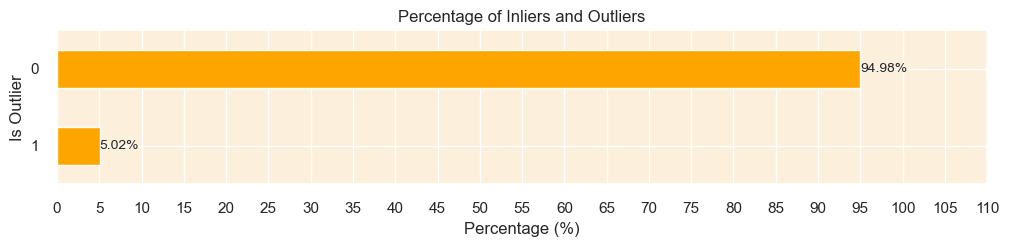

In [ ]:
#Calculate the percentage of inliers and outliers
outlier_percent=customer_data['Is_outlier'].value_counts(normalize=True)*100
#Plotting the percentage of inliers and outliers
plt.figure(figsize=(12,2))
outlier_percent.plot(kind='barh',color='orange')
for index,value in enumerate(outlier_percent):
    plt.text(value,index,f'{value:.2f}%',fontsize=10,ha='left',va='center')

plt.title('Percentage of Inliers and Outliers')
plt.xticks(ticks=np.arange(0, 115, 5))
plt.xlabel('Percentage (%)')
plt.ylabel('Is Outlier')
plt.gca().invert_yaxis()
plt.show()



Inference:
From the above plot, we can observe that about 5% of the customers have been identified as outliers in our dataset. This percentage seems to be a reasonable proportion, not too high to lose a significant amount of data, and not too low to retain potentially noisy data points. It suggests that our isolation forest algorithm has worked well in identifying a moderate percentage of outliers, which will be critical in refining our customer segmentation.

Strategy:
Considering the nature of the project (customer segmentation using clustering), it is crucial to handle these outliers to prevent them from affecting the clusters' quality significantly. Therefore, I will separate these outliers for further analysis and remove them from our main dataset to prepare it for the clustering analysis.

Let's proceed with the following steps:

Separate the identified outliers for further analysis and save them as a separate file (optional).
Remove the outliers from the main dataset to prevent them from influencing the clustering process.
Drop the Outlier_Scores and Is_Outlier columns as they were auxiliary columns used for the outlier detection process.
Let's implement these steps:

In [ ]:
# saperate outlier data for analysis
outlier_data=customer_data[customer_data['Is_outlier']==1]
# Remove outliers from main dataset
customer_data_cleaned=customer_data[customer_data['Is_outlier']==0]
#Drop the 'Outlier_Scores' and 'Is_Outlier' columns
customer_data_cleaned=customer_data_cleaned.drop(columns=['Outlier_scores','Is_outlier'])
#Reset the index of the cleaned data
customer_data_cleaned.reset_index(drop=True,inplace=True)




In [ ]:
customer_data_cleaned.shape

(4067, 18)

Correlation Analysis
Before we proceed to KMeans clustering, it's essential to check the correlation between features in our dataset. The presence of multicollinearity, where features are highly correlated, can potentially affect the clustering process by not allowing the model to learn the actual underlying patterns in the data, as the features do not provide unique information. This could lead to clusters that are not well-separated and meaningful.

If we identify multicollinearity, we can utilize dimensionality reduction techniques like PCA. These techniques help in neutralizing the effect of multicollinearity by transforming the correlated features into a new set of uncorrelated variables, preserving most of the original data's variance. This step not only enhances the quality of clusters formed but also makes the clustering process more computationally efficient.

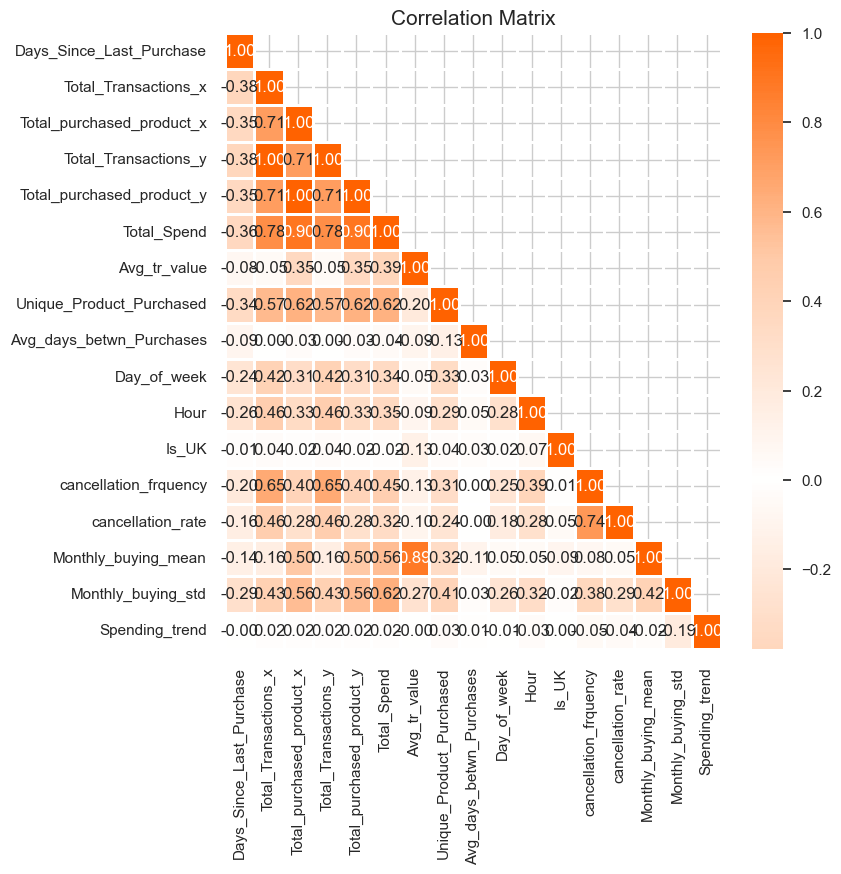

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
# Reset background style
sns.set_style('whitegrid')
#calculate the correlation matrix excluding 'CustomerID' column
corr=customer_data_cleaned.drop(columns=['CustomerID']).corr()
# Define a custom colormap
colors = ['#ff6200', '#ffcaa8', 'white', '#ffcaa8', '#ff6200']
my_cmap = LinearSegmentedColormap.from_list('custom_map', colors, N=256)
# Create a mask to only show the lower triangle of the matrix (since it's mirrored around its
# top-left to bottom-right diagonal)
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask,k=1)]=True
#plot the heatmap
plt.figure(figsize=(8,8))
sns.heatmap(corr,mask=mask,cmap=my_cmap,annot=True,center=0,fmt='.2f',linewidths=2)
plt.title('Correlation Matrix',fontsize=15)
plt.show()


Inference:
Looking at the heatmap, we can see that there are some pairs of variables that have high correlations, for instance:

Monthly_Spending_Mean and Average_Transaction_Value
Total_Spend and Total_Products_Purchased
Total_Transactions and Total_Spend
Cancellation_Rate and Cancellation_Frequency
Total_Transactions and Total_Products_Purchased
These high correlations indicate that these variables move closely together, implying a degree of multicollinearity.

Before moving to the next steps, considering the impact of multicollinearity on KMeans clustering, it might be beneficial to treat this multicollinearity possibly through dimensionality reduction techniques such as PCA to create a set of uncorrelated variables. This will help in achieving more stable clusters during the KMeans clustering process.

Feature Scaling


Before we move forward with the clustering and dimensionality reduction, it's imperative to scale our features. This step holds significant importance, especially in the context of distance-based algorithms like K-means and dimensionality reduction methods like PCA. Here's why:

For K-means Clustering: K-means relies heavily on the concept of 'distance' between data points to form clusters. When features are not on a similar scale, features with larger values can disproportionately influence the clustering outcome, potentially leading to incorrect groupings.
For PCA: PCA aims to find the directions where the data varies the most. When features are not scaled, those with larger values might dominate these components, not accurately reflecting the underlying patterns in the data.

Methodology:
Therefore, to ensure a balanced influence on the model and to reveal the true patterns in the data, I am going to standardize our data, meaning transforming the features to have a mean of 0 and a standard deviation of 1. However, not all features require scaling. Here are the exceptions and the reasons why they are excluded:

CustomerID: This feature is just an identifier for the customers and does not contain any meaningful information for clustering.
Is_UK: This is a binary feature indicating whether the customer is from the UK or not. Since it already takes a value of 0 or 1, scaling it won't make any significant difference.
Day_Of_Week: This feature represents the most frequent day of the week that the customer made transactions. Since it's a categorical feature represented by integers (1 to 7), scaling it would not be necessary.
I will proceed to scale the other features in the dataset to prepare it for PCA and K-means clustering.

In [ ]:
customer_data.columns

Index(['CustomerID', 'Days_Since_Last_Purchase', 'Total_Transactions_x',
       'Total_purchased_product_x', 'Total_Transactions_y',
       'Total_purchased_product_y', 'Total_Spend', 'Avg_tr_value',
       'Unique_Product_Purchased', 'Avg_days_betwn_Purchases', 'Day_of_week',
       'Hour', 'Is_UK', 'cancellation_frquency', 'cancellation_rate',
       'Monthly_buying_mean', 'Monthly_buying_std', 'Spending_trend',
       'Outlier_scores', 'Is_outlier'],
      dtype='object')

In [ ]:
# initialize standered scaler
scaler=StandardScaler()
#List of columns that do not need to scale
columns_to_exclude=['CustomerID','Is_UK','Day_of_week']
#list of columns that need to be scaled
columns_to_scale=customer_data_cleaned.columns.difference(columns_to_exclude)
# copy the cleaned dataset
customer_data_scaled=customer_data_cleaned.copy()
#Applying the scaler to the necessary columns in the dataset
customer_data_scaled[columns_to_scale]=scaler.fit_transform(customer_data_cleaned[columns_to_scale])


In [ ]:
customer_data_scaled.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions_x,Total_purchased_product_x,Total_Transactions_y,Total_purchased_product_y,Total_Spend,Avg_tr_value,Unique_Product_Purchased,Avg_days_betwn_Purchases,Day_of_week,Hour,Is_UK,cancellation_frquency,cancellation_rate,Monthly_buying_mean,Monthly_buying_std,Spending_trend
0,12346.0,2.338318,-0.483451,-0.815707,-0.483451,-0.815707,-0.853516,-1.309265,-0.903670,-0.300414,1,-1.746463,1,0.423866,0.406051,-1.323443,-0.713465,0.090174
1,12347.0,-0.905160,0.750356,2.249661,0.750356,2.249661,2.534525,1.505575,0.803939,-0.124920,3,0.307457,0,-0.544052,-0.427077,0.980192,1.257860,0.115564
2,12348.0,-0.172114,0.010072,2.092527,0.010072,2.092527,0.276282,0.333380,-0.568845,0.646826,6,1.950592,0,-0.544052,-0.427077,0.020880,0.464898,-0.480817
3,12349.0,-0.744493,-0.730213,-0.030035,-0.730213,-0.030035,0.292248,5.354166,0.284960,-0.300414,0,-2.157247,0,-0.544052,-0.427077,4.129838,-0.713465,0.090174
4,12350.0,2.187692,-0.730213,-0.571276,-0.730213,-0.571276,-0.622091,0.036633,-0.652551,-0.300414,2,0.718241,0,-0.544052,-0.427077,-0.221974,-0.713465,0.090174


Dimensionality Reduction

Why We Need Dimensionality Reduction?
Multicollinearity Detected: In the previous steps, we identified that our dataset contains multicollinear features. Dimensionality reduction can help us remove redundant information and alleviate the multicollinearity issue.
Better Clustering with K-means: Since K-means is a distance-based algorithm, having a large number of features can sometimes dilute the meaningful underlying patterns in the data. By reducing the dimensionality, we can help K-means to find more compact and well-separated cluster
Noise Reduction: By focusing only on the most important features, we can potentially remove noise in the data, leading to more accurate and stable clusters.
Enhanced Visualization: In the context of customer segmentation, being able to visualize customer groups in two or three dimensions can provide intuitive insights. Dimensionality reduction techniques can facilitate this by reducing the data to a few principal components which can be plotted easily.
Improved Computational Efficiency: Reducing the number of features can speed up the computation time during the modeling process, making our clustering algorithm more efficie
Let's proceed to select an appropriate dimensionality reduction method to our data.t.s.

Which Dimensionality Reduction Method?
In this step, we are considering the application of dimensionality reduction techniques to simplify our data while retaining the essential information. Among various methods such as KernelPCA, ICA, ISOMAP, TSNE, and UMAP, I am starting with PCA (Principal Component Analysis). Here's why:

PCA is an excellent starting point because it works well in capturing linear relationships in the data, which is particularly relevant given the multicollinearity we identified in our dataset. It allows us to reduce the number of features in our dataset while still retaining a significant amount of the information, thus making our clustering analysis potentially more accurate and interpretable. Moreover, it is computationally efficient, which means it won't significantly increase the processing time.

However, it's essential to note that we are keeping our options open. After applying PCA, if we find that the first few components do not capture a significant amount of variance, indicating a loss of vital information, we might consider exploring other non-linear methods. These methods can potentially provide a more nuanced approach to dimensionality reduction, capturing complex patterns that PCA might miss, albeit at the cost of increased computational time and complexity.

Methodology
I will apply PCA on all the available components and plot the cumulative variance explained by them. This process will allow me to visualize how much variance each additional principal component can explain, thereby helping me to pinpoint the optimal number of components to retain for the analysis:

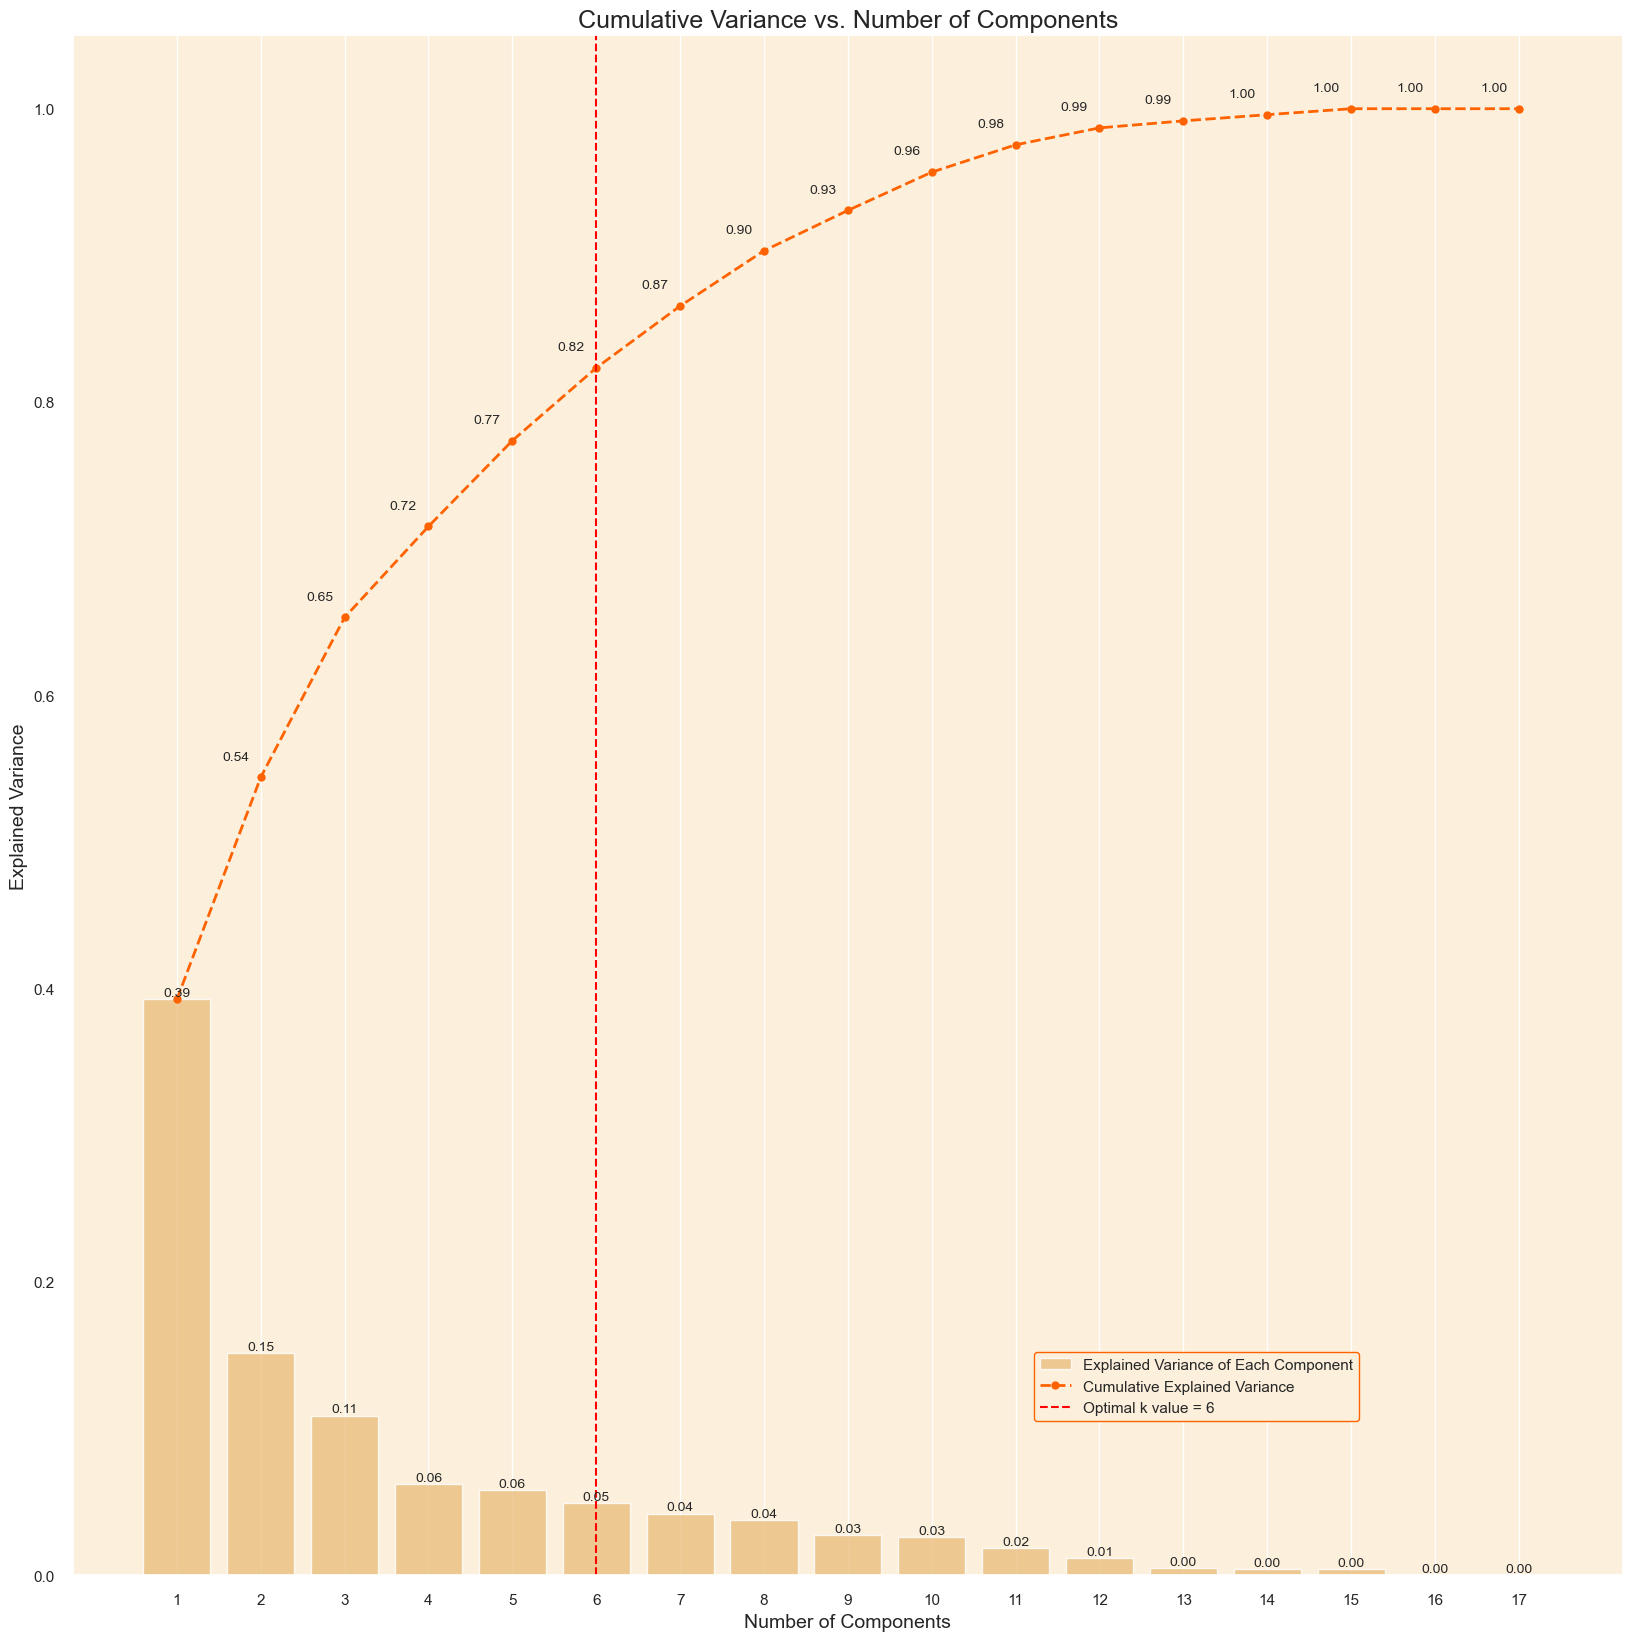

In [ ]:
# setting customer id as index column
customer_data_scaled.set_index('CustomerID',inplace=True)
# apply PCA
pca=PCA().fit(customer_data_scaled)
#Calculate the Cumulative Sum of the Explained Variance
explained_variance_ratio=pca.explained_variance_ratio_
cumulative_explained_variance=np.cumsum(explained_variance_ratio)
#Set the optimal k value (based on our analysis, we can choose 6)
optimal_k=6
#set seaborn plot style
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')
#Plot the cumulative explained variance against the number of components
plt.figure(figsize=(20,20))
#Bar chart for the explained variance of each component
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)),
                      y=explained_variance_ratio,
                      color='#fcc36d',
                      alpha=0.8)

# Line plot for the cumulative explained variance
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance,
                     marker='o', linestyle='--', color='#ff6200', linewidth=2)

# Plot optimal k value line
optimal_k_line = plt.axvline(optimal_k - 1, color='red', linestyle='--', label=f'Optimal k value = {optimal_k}')
# Set labels and title
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# Customize ticks and legend
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot, optimal_k_line],
           labels=['Explained Variance of Each Component', 'Cumulative Explained Variance', f'Optimal k value = {optimal_k}'],
           loc=(0.62, 0.1),
           frameon=True,
           framealpha=1.0,
           edgecolor='#ff6200')

# Display the variance values for both graphs on the plots
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')
plt.show()

In [ ]:
explained_variance_ratio

array([3.92658136e-01, 1.51525865e-01, 1.08987524e-01, 6.20619432e-02,
       5.84643519e-02, 4.96210031e-02, 4.21689625e-02, 3.76980318e-02,
       2.74644580e-02, 2.60907094e-02, 1.86382718e-02, 1.15592151e-02,
       4.77599568e-03, 4.22207357e-03, 4.06345853e-03, 1.74176285e-33,
       4.10778588e-34])

In [ ]:
cumulative_explained_variance

array([0.39265814, 0.544184  , 0.65317153, 0.71523347, 0.77369782,
       0.82331882, 0.86548779, 0.90318582, 0.93065028, 0.95674099,
       0.97537926, 0.98693847, 0.99171447, 0.99593654, 1.        ,
       1.        , 1.        ])

Conclusion
The plot and the cumulative explained variance values indicate how much of the total variance in the dataset is captured by each principal component, as well as the cumulative variance explained by the first n components.

Here, we can observe that:

The first component explains approximately 39% of the variance.

The first two components together explain about 54% of the variance.

The first three components explain approximately 65% of the variance, and so on.
To choose the optimal number of components, we generally look for a point where adding another component doesn't significantly increase the cumulative explained variance, often referred to as the "elbow point" in the curve.

From the plot, we can see that the increase in cumulative variance starts to slow down after the 6th component (which captures about281% of the total variance).

Considering the context of customer segmentation, we want to retain a sufficient amount of information to identify distinct customer groups effectively. Therefore, retaining the first 6 components might be a balanced choice, as they together explain a substantial portion of the total variance while reducing the dimensionality of the dataset.

In [ ]:
# create PCA object with 6 components
pca=PCA(n_components=6)
#Fitting and transforming the original data to the new PCA dataframe
customer_data_pca=pca.fit_transform(customer_data_scaled)
#Creating a new dataframe from the PCA dataframe, with columns labeled PC1, PC2, etc.
customer_data_pca=pd.DataFrame(customer_data_pca,columns=['PC'+str(i+1) for i in range(pca.n_components_)])
#Adding the CustomerID index back to the new PCA dataframe
customer_data_pca.index=customer_data_scaled.index

In [ ]:
customer_data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
CustomerID,,,,,,
12346.0,-3.511026,0.266383,2.215156,-0.055226,-1.391999,0.575876
12347.0,3.258991,3.198502,-0.714448,-0.785260,0.759498,-0.834688
12348.0,2.602021,-0.700988,-1.478371,0.230022,1.213931,-0.484972
12349.0,-1.463549,6.693933,-2.596022,0.381968,-0.247112,1.721136
12350.0,-2.556185,0.628895,0.384191,0.065636,-0.768646,0.222476


Now, let's extract the coefficients corresponding to each principal component to better understand the transformation performed by PCA:

In [ ]:
#Define a function to highlight the top 3 absolute values in each column of a dataframe
def highlight_top3(column):
    top3 = column.abs().nlargest(3).index
    return ['background-color:  #ffeacc' if i in top3 else '' for i in column.index]

# Create the PCA component DataFrame and apply the highlighting function
pc_df = pd.DataFrame(pca.components_.T, columns=['PC{}'.format(i+1) for i in range(pca.n_components_)],
                     index=customer_data_scaled.columns)

pc_df.style.apply(highlight_top3, axis=0)

,PC1,PC2,PC3,PC4,PC5,PC6
Days_Since_Last_Purchase,-0.173976,-0.000844,-0.014202,0.089431,-0.407956,0.266629
Total_Transactions_x,0.322763,-0.025675,0.234121,-0.144115,-0.014418,-0.087903
Total_purchased_product_x,0.317777,0.210552,-0.020263,-0.127832,0.042493,-0.080315
Total_Transactions_y,0.322763,-0.025675,0.234121,-0.144115,-0.014418,-0.087903
Total_purchased_product_y,0.317777,0.210552,-0.020263,-0.127832,0.042493,-0.080315
Total_Spend,0.329673,0.202766,-0.016769,-0.077665,0.014250,-0.016788
Avg_tr_value,0.077502,0.411094,-0.398710,0.122058,-0.024984,0.251459
Unique_Product_Purchased,0.259203,0.087834,-0.029370,-0.166024,-0.095987,-0.237163
Avg_days_betwn_Purchases,-0.006296,-0.084207,0.062188,0.042981,0.825512,0.398963
Day_of_week,0.422185,-0.702533,-0.545720,0.075537,-0.085209,0.117546


K-Means Clustoring


K-Means:
K-Means is an unsupervised machine learning algorithm that clusters data into a specified number of groups (K) by minimizing the within-cluster sum-of-squares (WCSS), also known as inertia. The algorithm iteratively assigns each data point to the nearest centroid, then updates the centroids by calculating the mean of all assigned points. The process repeats until convergence or a stopping criterion is reached.

Drawbacks of K-Means:
Here are the main drawbacks of the K-means clustering algorithm and their corresponding solutions:1.Inertia is influenced by the number of dimensions: The value of inertia tends to increase in high-dimensional spaces due to the curse of dimensionality, which can distort the Euclidean distances between data points.
Solution: Performing dimensionality reduction, such as PCA, before applying K-means to alleviate this issue and speed up computations

2.Dependence on Initial Centroid Placement: The K-means algorithm might find a local minimum instead of a global minimum, based on where the centroids are initially placed.
Solution: To enhance the likelihood of locating the global minimum, we can employ the k-means++ initialization method

3.Requires specifying the number of clusters: K-means requires specifying the number of clusters (K) beforehand, which may not be known in advance.
Solution: Using methods such as the elbow method and silhouette analysis to estimate the optimal number of clusters

4.Sensitivity to unevenly sized or sparse clusters: K-means might struggle with clusters of different sizes or densities.
Solution: Increasing the number of random initializations (n_init) or consider using algorithms that handle unevenly sized clusters better, like GMM or DBSCAN

5.Assumes convex and isotropic clusters: K-means assumes that clusters are spherical and have similar variances, which is not always the case. It may struggle with elongated or irregularly shaped clusters.
Solution: Considering using clustering algorithms that do not make these assumptions, such as DBSCAN or Gaussian Mixture Model (GMM)

Taking into account the aforementioned considerations, I initially applied PCA to the dataset. For the KMeans algorithm, I will set the init parameter to k-means++ and n_init to 10. To determine the optimal number of clusters, I will employ the elbow method and silhouette analysis. Additionally, it might be beneficial to explore the use of alternative clustering algorithms such as GMM and DBSCAN in future analyses to potentially enhance the segmentation results......

Determining the Optimal no of clustors


To ascertain the optimal number of clusters (k) for segmenting customers, I will explore two renowned methods:

Elbow Method

Silhouette Method

It's common to utilize both methods in practice to corroborate the results.

Elbow Method

What is the Elbow Method?
The Elbow Method is a technique for identifying the ideal number of clusters in a dataset. It involves iterating through the data, generating clusters for various values of k. The k-means algorithm calculates the sum of squared distances between each data point and its assigned cluster centroid, known as the inertia or WCSS score. By plotting the inertia score against the k value, we create a graph that typically exhibits an elbow shape, hence the name "Elbow Method". The elbow point represents the k-value where the reduction in inertia achieved by increasing k becomes negligible, indicating the optimal stopping point for the number of clusters.

Utilizing the YellowBrick Library
In this section, I will employ the YellowBrick library to facilitate the implementation of the Elbow method. YellowBrick, an extension of the Scikit-Learn API, is renowned for its ability to rapidly generate insightful visualizations in the field of machine learning.

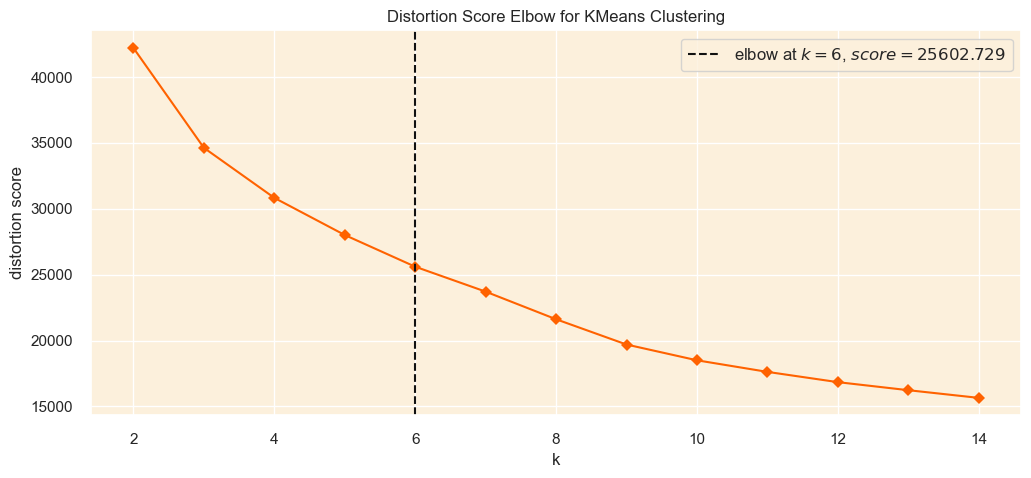

In [ ]:
#Set plot style, and background color
sns.set(style='darkgrid',rc={'axes.facecolor':'#fcf0dc'})
#Set the color palette for the plot
sns.set_palette(['#ff6200'])
#Instantiate the clustering model with the specified parameters
km=KMeans(init='k-means++',n_init=10,max_iter=100,random_state=0)
#Create a figure and axis with the desired size
fig,ax=plt.subplots(figsize=(12,5))
#Instantiate the KElbowVisualizer with the model and range of k values, and disable the timing plot
visualizer=KElbowVisualizer(km,k=(2,15),timings=False,ax=ax)
#fit the data to visualizer
visualizer.fit(customer_data_pca)
#finalize and render the figure
visualizer.show();

Optimal k Value: Elbow Method Insights
The optimal value of k for the KMeans clustering algorithm can be found at the elbow point. Using the YellowBrick library for the Elbow method, we observe that the suggested optimal k value is 5. However, we don't have a very distinct elbow point in this case, which is common in real-world data. From the plot, we can see that the inertia continues to decrease significantly up to k=5, indicating that the optimum value of k could be between 3 and 7. To choose the best k within this range, we can employ the silhouette analysis, another cluster quality evaluation method. Additionally, incorporating business insights can help determine a practical k value.

Silhoute method

What is the Silhouette Method?
The Silhouette Method is an approach to find the optimal number of clusters in a dataset by evaluating the consistency within clusters and their separation from other clusters. It computes the silhouette coefficient for each data point, which measures how similar a point is to its own cluster compared to other clusters.

What is the Silhouette Coefficient?
To determine the silhouette coefficient for a given point i, follow these steps:

Calculate a(i): Compute the average distance between point i and all other points within its cluster.
Calculate b(i): Compute the average distance between point i and all points in the nearest cluster to its own.
Compute the silhouette coefficient, s(i), for point i using the following for
s(i)=b(i)-a(i)/max(b(i),a(i))
Note: The silhouette coefficient quantifies the similarity of a point to its own cluster (cohesion) relative to its separation from other clusters. This value ranges from -1 to 1, with higher values signifying that the point is well aligned with its cluster and has a low similarity to neighboring clusters.

What is the Silhouette Score?
The silhouette score is the average silhouette coefficient calculated for all data points in a dataset. It provides an overall assessment of the clustering quality, taking into account both cohesion within clusters and separation between clusters. A higher silhouette score indicates a better clustering configuration.
What are the Advantages of Silhouette Method over the Elbow Method?
The Silhouette Method evaluates cluster quality by considering both the cohesion within clusters and their separation from other clusters. This provides a more comprehensive measure of clustering performance compared to the Elbow Method, which only considers the inertia (sum of squared distances within clusters)
.
The Silhouette Method produces a silhouette score that directly quantifies the quality of clustering, making it easier to compare different values of k. In contrast, the Elbow Method relies on the subjective interpretation of the elbow point, which can be less reliable in cases where the plot does not show a clear elbo

The Silhouette Method generates a visual representation of silhouette coefficients for each data point, allowing for easier identification of fluctuations and outliers within clusters. This helps in determining the optimal number of clusters with higher confidence, as opposed to the Elbow Method, which relies on visual inspection of the inertia plot.
w.
mu
b
(
i
)
,
a
(
i
)
)



Methodology
In the following analysis:

I will initially choose a range of 2-6 for the number of clusters (k) based on the Elbow method from the previous section. Next, I will plot Silhouette scores for each k value to determine the one with the highest score.
Subsequently, to fine-tune the selection of the most appropriate k, I will generate Silhouette plots that visually display the silhouette coefficients for each data point within various clusters.
The YellowBrick library will be utilized once again to create these plots and facilitate a comparative analysis.

In [ ]:
def silhouette_analysis(df, start_k, stop_k, figsize=(15, 16)):
    """
    Perform Silhouette analysis for a range of k values and visualize the results.
    """

    # Set the size of the figure
    plt.figure(figsize=figsize)

    # Create a grid with (stop_k - start_k + 1) rows and 2 columns
    grid = gridspec.GridSpec(stop_k - start_k + 1, 2)
    # Assign the first plot to the first row and both columns
    first_plot = plt.subplot(grid[0, :])

    # First plot: Silhouette scores for different k values
    sns.set_palette(['darkorange'])

    silhouette_scores = []
    # Iterate through the range of k values
    for k in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=0)
        km.fit(df)
        labels = km.predict(df)
        score = silhouette_score(df, labels)
        silhouette_scores.append(score)

    best_k = start_k + silhouette_scores.index(max(silhouette_scores))
    plt.plot(range(start_k, stop_k + 1), silhouette_scores, marker='o')
    plt.xticks(range(start_k, stop_k + 1))
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette score')
    plt.title('Average Silhouette Score for Different k Values', fontsize=15)

    # Add the optimal k value text to the plot
    optimal_k_text = f'The k value with the highest Silhouette score is: {best_k}'
    plt.text(10, 0.23, optimal_k_text, fontsize=12, verticalalignment='bottom',
             horizontalalignment='left', bbox=dict(facecolor='#fcc36d', edgecolor='#ff6200', boxstyle='round, pad=0.5'))
    # Second plot (subplot): Silhouette plots for each k value
    colors = sns.color_palette("bright")

    for i in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
        row_idx, col_idx = divmod(i - start_k, 2)

        # Assign the plots to the second, third, and fourth rows
        ax = plt.subplot(grid[row_idx + 1, col_idx])
        visualizer = SilhouetteVisualizer(km, colors=colors, ax=ax)
        visualizer.fit(df)

        # Add the Silhouette score text to the plot
        score = silhouette_score(df, km.labels_)
        ax.text(0.97, 0.02, f'Silhouette Score: {score:.2f}', fontsize=12, \
                ha='right', transform=ax.transAxes, color='red')

        ax.set_title(f'Silhouette Plot for {i} Clusters', fontsize=15)
    plt.tight_layout()
    plt.show()



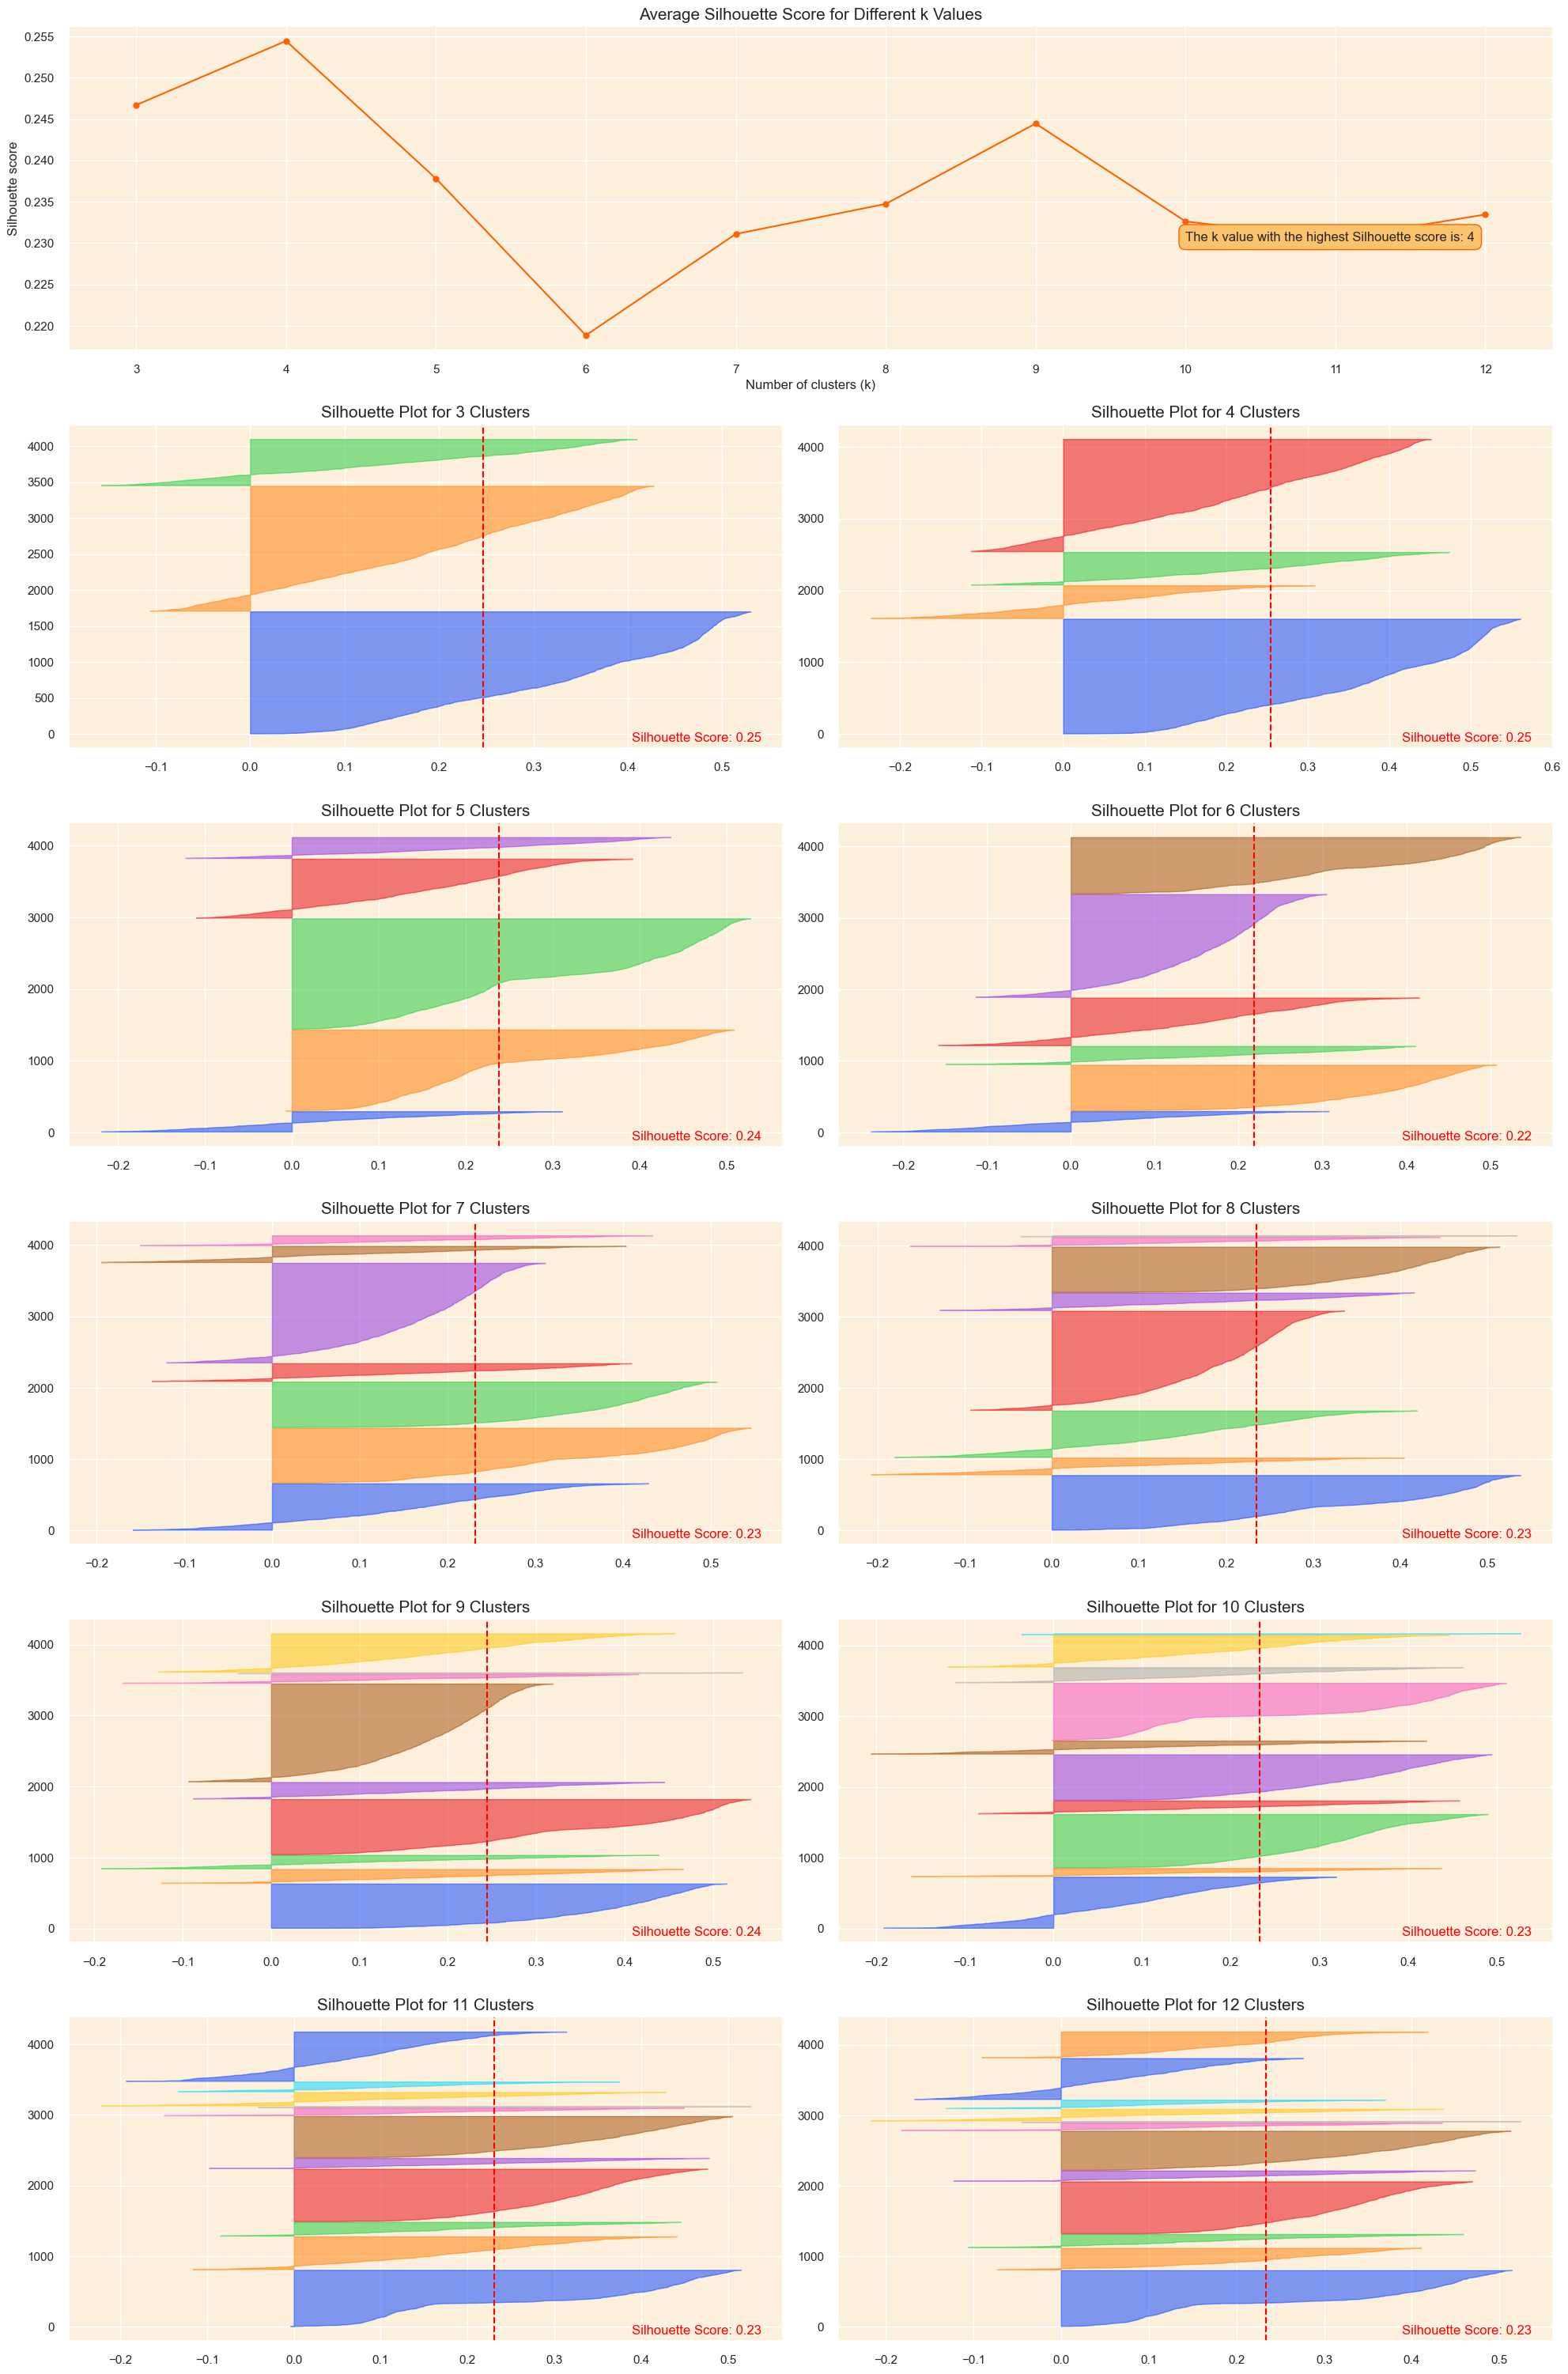

In [ ]:
silhouette_analysis(customer_data_pca, 3, 12, figsize=(20, 50))

Guidelines to Interpret Silhouette Plots and Determine the Optimal K:
To interpret silhouette plots and identify the optimal number of clusters (( k )), consider the following criteria:

1.Analyze the Silhouette Plots:

Silhouette Score Width:

Wide Widths (closer to +1): Indicate that the data points in the cluster are well separated from points in other clusters, suggesting well-defined clusters.
Narrow Widths (closer to -1): Show that data points in the cluster are not distinctly separated from other clusters, indicating poorly defined clus

Average Silhouette Score:

High Average Width: A cluster with a high average silhouette score indicates well-separated clusters.
Low Average Width: A cluster with a low average silhouette score indicates poor separation between cluste

2.Uniformity in Cluster Size:
1 Cluster Thickness:

Uniform Thickness: Indicates that clusters have a roughly equal number of data points, suggesting a balanced clustering structure.
Variable Thickness: Signifies an imbalance in the data point distribution across clusters, with some clusters having many data points and others too
3.Peaks in Average Silhouette Score:
Clear Peaks: A clear peak in the average silhouette score plot for a specific ( k ) value indicates this ( k ) might be optimal

4.Minimize Fluctuations in Silhouette Plot Widths:
Uniform Widths: Seek silhouette plots with similar widths across clusters, suggesting a more balanced and optimal clustering.
Variable Widths: Avoid wide fluctuations in silhouette plot widths, indicating that clusters are not well-defined and may vary in compactnes

5.Optimal Cluster Selection:
Maximize the Overall Average Silhouette Score: Choose the ( k ) value that gives the highest average silhouette score across all clusters, indicating well-defined clusters.
Avoid Below-Average Silhouette Scores: Ensure most clusters have above-average silhouette scores to prevent suboptimal clus
tering structures
6.Visual Inspection of Silhouette Plots:
Consistent Cluster Formation: Visually inspect the silhouette plots for each ( k ) value to evaluate the consistency and structure of the formed clusters.
Cluster Compactness: Look for more compact clusters, with data points having silhouette scores closer to +1, indicating be.

s..few.
rs.ters.

Optimal k Value: Silhouette Method Insights

Based on above guidelines and after carefully considering the silhouette plots, it's clear that choosing ( k = 3 ) is the better option. This choice gives us clusters that are more evenly matched and well-defined, making our clustering solution stronger and more reliable.

Clustering Model K-Means

In this step, I am going to apply the K-means clustering algorithm to segment customers into different clusters based on their purchasing behaviors and other characteristics, using the optimal number of clusters determined in the previous step.

It's important to note that the K-means algorithm might assign different labels to the clusters in each run. To address this, we have taken an additional step to swap the labels based on the frequency of samples in each cluster, ensuring a consistent label assignment across different runs.

In [ ]:
# Apply K-Means clustering using optimal value of k.
kmeans=KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=100,random_state=0)
kmeans.fit(customer_data_pca)
#Get the frequency of each cluster
cluster_frequencies=Counter(kmeans.labels_)


In [ ]:
#Create a mapping from old labels to new labels based on frequency
label_mapping = {label: new_label for new_label, (label, _) in
                 enumerate(cluster_frequencies.most_common())}

# Reverse the mapping to assign labels as per your criteria
label_mapping = {v: k for k, v in {2: 1, 1: 0, 0: 2}.items()}

# Apply the mapping to get the new labels
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

# Append the new cluster labels back to the original dataset
customer_data_cleaned['cluster'] = new_labels

# Append the new cluster labels to the PCA version of the dataset
customer_data_pca['cluster'] = new_labels

In [ ]:
# Display the first few rows of the original dataframe
customer_data_cleaned.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions_x,Total_purchased_product_x,Total_Transactions_y,Total_purchased_product_y,Total_Spend,Avg_tr_value,Unique_Product_Purchased,Avg_days_betwn_Purchases,Day_of_week,Hour,Is_UK,cancellation_frquency,cancellation_rate,Monthly_buying_mean,Monthly_buying_std,Spending_trend,cluster
0,12346.0,325,2,0,2,0,0.0,0.0,1,0.0,1,10,1,1,0.5,0.0,0.0,0.0,1
1,12347.0,2,7,2458,7,2458,4310.0,615.714286,103,2.016575,3,15,0,0,0.0,615.714286,341.070789,4.486071,0
2,12348.0,75,4,2332,4,2332,1437.24,359.31,21,10.884615,6,19,0,0,0.0,359.31,203.875689,-100.884,2
3,12349.0,18,1,630,1,630,1457.55,1457.55,72,0.0,0,9,0,0,0.0,1457.55,0.0,0.0,1
4,12350.0,310,1,196,1,196,294.4,294.4,16,0.0,2,16,0,0,0.0,294.4,0.0,0.0,1


Clustering Evaluation

After determining the optimal number of clusters (which is 3 in our case) using elbow and silhouette analyses, I move onto the evaluation step to assess the quality of the clusters formed. This step is essential to validate the effectiveness of the clustering and to ensure that the clusters are coherent and well-separated. The evaluation metrics and a visualization technique I plan to use are outlined below:
1.3D Visualization of Top PCs
2.Cluster Distribution Visualization
3.Evaluation Metrics

Silhouette Score
Calinski Harabasz Score
Davies Bouldin Sc
ore


Note: We are using the PCA version of the dataset for evaluation because this is the space where the clusters were actually formed, capturing the most significant patterns in the data. Evaluating in this space ensures a more accurate representation of the cluster quality, helping us understand the true cohesion and separation achieved during clustering. This approach also aids in creating a clearer 3D visualization using the top principal components, illustrating the actual separation between clusters.

3D Visualization of Top Principal Components

In this part, I am going to choose the top 3 PCs (which capture the most variance in the data) and use them to create a 3D visualization. This will allow us to visually inspect the quality of separation and cohesion of clusters to some extent:

In [ ]:
# Setting up the color scheme for the clusters (RGB order)
colors = ['#e8000b', '#1ac938', '#023eff']

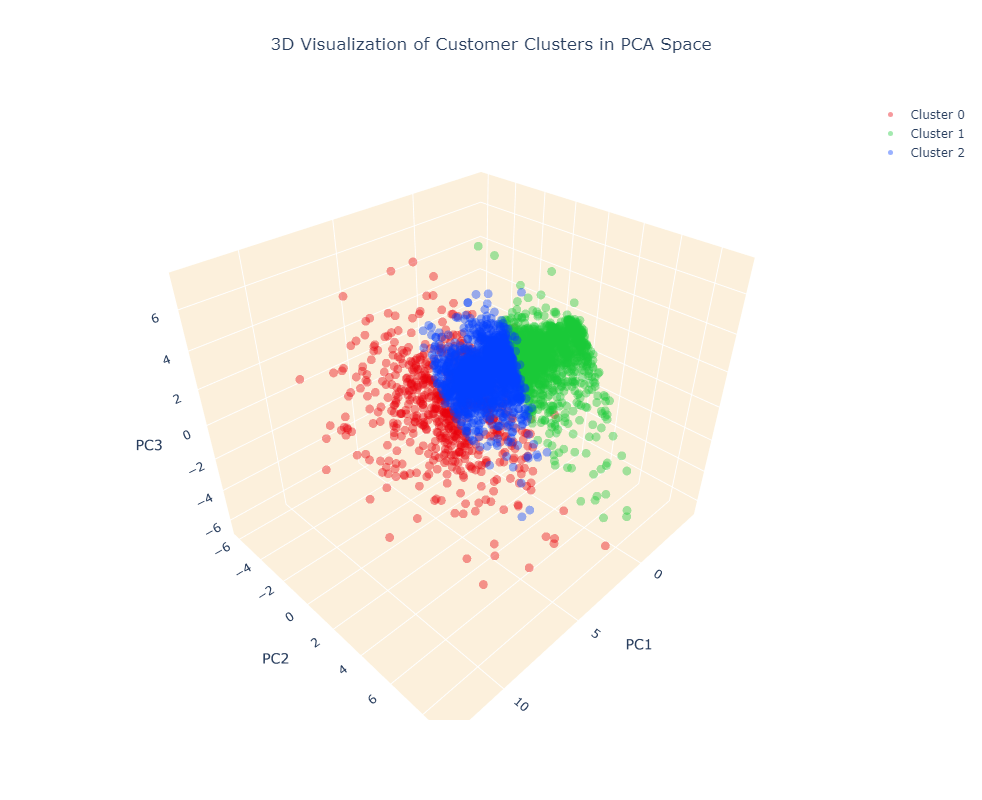

In [ ]:
# Create separate data frames for each cluster
cluster_0 = customer_data_pca[customer_data_pca['cluster'] == 0]
cluster_1 = customer_data_pca[customer_data_pca['cluster'] == 1]
cluster_2 = customer_data_pca[customer_data_pca['cluster'] == 2]

# Create a 3D scatter plot
fig = go.Figure()
# Add data points for each cluster separately and specify the color
fig.add_trace(go.Scatter3d(x=cluster_0['PC1'], y=cluster_0['PC2'], z=cluster_0['PC3'],
                           mode='markers', marker=dict(color=colors[0], size=5, opacity=0.4), name='Cluster 0'))
fig.add_trace(go.Scatter3d(x=cluster_1['PC1'], y=cluster_1['PC2'], z=cluster_1['PC3'],
                           mode='markers', marker=dict(color=colors[1], size=5, opacity=0.4), name='Cluster 1'))
fig.add_trace(go.Scatter3d(x=cluster_2['PC1'], y=cluster_2['PC2'], z=cluster_2['PC3'],
                           mode='markers', marker=dict(color=colors[2], size=5, opacity=0.4), name='Cluster 2'))

# Set the title and layout details
fig.update_layout(
    title=dict(text='3D Visualization of Customer Clusters in PCA Space', x=0.5),
    scene=dict(
        xaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC1'),
        yaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC2'),
        zaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC3'),
    ),
    width=900,
    height=800
)

# Show the plot
fig.show()


Cluster Distribution Visualization

I am going to utilize a bar plot to visualize the percentage of customers in each cluster, which helps in understanding if the clusters are balanced and significant:

In [ ]:
customer_data_pca['cluster'].value_counts()

cluster
2    1732
1    1694
0     641
Name: count, dtype: int64

In [ ]:
#Calculate the percentage of customers in each cluster
cluster_percentage=(customer_data_pca['cluster'].value_counts(normalize=True)*100).reset_index()

In [ ]:
cluster_percentage


,cluster,proportion
0,2,42.586673
1,1,41.652324
2,0,15.761003


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9692\1019563448.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




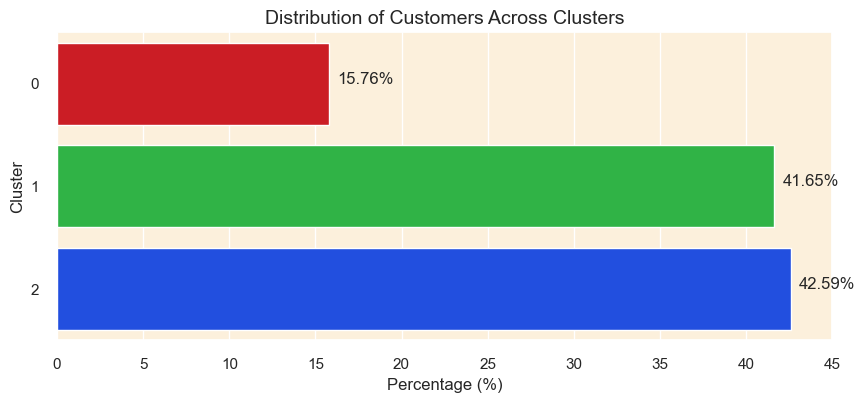

In [ ]:
cluster_percentage.columns=['Cluster','Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)
# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')
# Show the plot
plt.show()

Inference
The distribution of customers across the clusters, as depicted by the bar plot, suggests a fairly balanced distribution with clusters 1 and 2 holding around 41% and 43% of customers and cluster 0 accommodating approximately 16% of the customers.

This balanced distribution indicates that our clustering process has been largely successful in identifying meaningful patterns within the data, rather than merely grouping noise or outliers. It implies that each cluster represents a substantial and distinct segment of the customer base, thereby offering valuable insights for future business strategies.

Moreover, the fact that no cluster contains a very small percentage of customers, assures us that each cluster is significant and not just representing outliers or noise in the data. This setup allows for a more nuanced understanding and analysis of different customer segments, facilitating effective and informed decision-making.

Evaluation Metrics

To further scrutinize the quality of our clustering, I will employ the following metrics:

Silhouette Score: A measure to evaluate the separation distance between the clusters. Higher values indicate better cluster separation. It ranges from -1 to 1.
Calinski Harabasz Score: This score is used to evaluate the dispersion between and within clusters. A higher score indicates better defined clusters.
Davies Bouldin Score: It assesses the average similarity between each cluster and its most similar cluster. Lower values indicate better cluster separation.

In [ ]:
# Compute number of customers
num_observations = len(customer_data_pca)

# Separate the features and the cluster labels
X = customer_data_pca.drop('cluster', axis=1)
clusters = customer_data_pca['cluster']
# Compute the metrics
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)
# Create a table to display the metrics and the number of observations
table_data = [
    ["Number of Observations", num_observations],
    ["Silhouette Score", sil_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]
]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+-------------------------+---------------------+
|         Metric          |        Value        |
+-------------------------+---------------------+
| Number of Observations  |        4067         |
|    Silhouette Score     | 0.24669156037717221 |
| Calinski Harabasz Score | 1576.1191559352349  |
|  Davies Bouldin Score   | 1.3813189891934556  |
+-------------------------+---------------------+


Clustering Quality Inference
The Silhouette Score of approximately 0.24, although not close to 1, still indicates a fair amount of separation between the clusters. It suggests that the clusters are somewhat distinct, but there might be slight overlaps between them. Generally, a score closer to 1 would be ideal, indicating more distinct and well-separated clusters

The Calinski Harabasz Score is 1391, which is considerably high, indicating that the clusters are well-defined. A higher score in this metric generally signals better cluster definitions, thus implying that our clustering has managed to find substantial structure in the data.

The Davies Bouldin Score of 1.41 is a reasonable score, indicating a moderate level of similarity between each cluster and its most similar one. A lower score is generally better as it indicates less similarity between clusters, and thus, our score here suggests a decent separation between the clusters.

In conclusion, the metrics suggest that the clustering is of good quality, with clusters being well-defined and fairly separated. However, there might still be room for further optimization to enhance cluster separation and definition, potentially by trying other clustering and dimensionality reduction algorithms.

Cluster Analysis and Profiling

In this section, I am going to analyze the characteristics of each cluster to understand the distinct behaviors and preferences of different customer segments and also profile each cluster to identify the key traits that define the customers in each cluster.

Radar Chart Approach

First of all, I am going to create radar charts to visualize the centroid values of each cluster across different features. This can give a quick visual comparison of the profiles of different clusters.To construct the radar charts, it's essential to first compute the centroid for each cluster. This centroid represents the mean value for all features within a specific cluster. Subsequently, I will display these centroids on the radar charts, facilitating a clear visualization of the central tendencies of each feature across the various clusters:

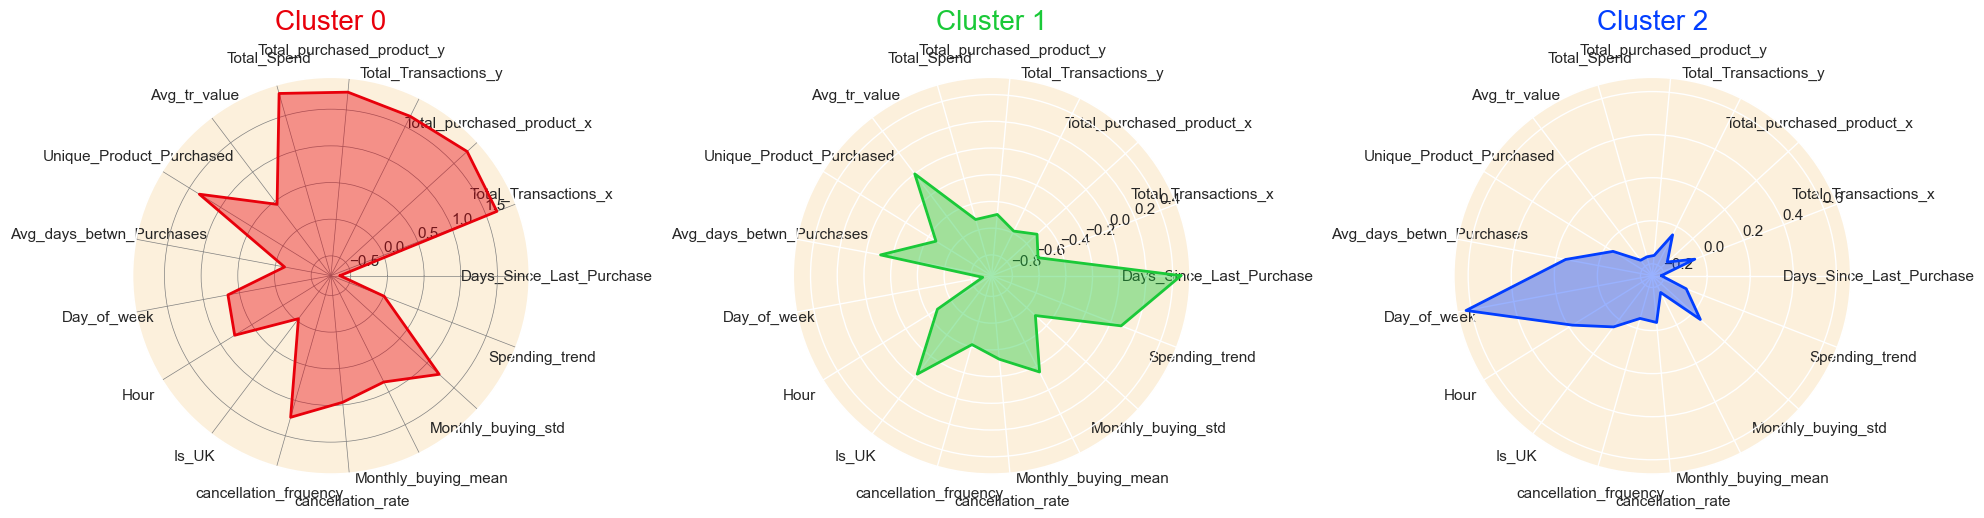

In [ ]:
# Setting 'CustomerID' column as index and assigning it to a new dataframe
df_customer = customer_data_cleaned.set_index('CustomerID')

# Standardize the data (excluding the cluster column)
scaler = StandardScaler()
df_customer_standardized = scaler.fit_transform(df_customer.drop(columns=['cluster'], axis=1))

# Create a new dataframe with standardized values and add the cluster column back
df_customer_standardized = pd.DataFrame(df_customer_standardized, columns=df_customer.columns[:-1], index=df_customer.index)
df_customer_standardized['cluster'] = df_customer['cluster']
# Calculate the centroids of each cluster
cluster_centroids = df_customer_standardized.groupby('cluster').mean()

# Function to create a radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')

    # Add a title
    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)
# Set data
labels=np.array(cluster_centroids.columns)
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Initialize the figure
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(polar=True), nrows=1, ncols=3)
# Create radar chart for each cluster
for i, color in enumerate(colors):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]  # Complete the loop
    create_radar_chart(ax[i], angles, data, color, i)
# Add input data
ax[0].set_xticks(angles[:-1])
ax[0].set_xticklabels(labels[:-1])

ax[1].set_xticks(angles[:-1])
ax[1].set_xticklabels(labels[:-1])

ax[2].set_xticks(angles[:-1])
ax[2].set_xticklabels(labels[:-1])

# Add a grid
ax[0].grid(color='grey', linewidth=0.5)
# Display the plot
plt.tight_layout()
plt.show()

Cluster 0 (Red Chart):
Profile:Frequent High-Spenders with a High Rate of Cancellations
Customers in this cluster are high spenders with a very high total spend, and they purchase a wide variety of unique products.
They engage in frequent transactions, but also have a high cancellation frequency and rate.
These customers have a very low average time between purchases, and they tend to shop early in the day (low Hour value).
Their monthly spending shows high variability, indicating that their spending patterns might be less predictable compared to other clusters.
Despite their high spending, they show a low spending trend, suggesting that their high spending levels might be decreasing over time.

Cluster 1 (Green Chart):
Profile:Infrequent Big Spenders with a High Spending Trend
Customers in this cluster show a moderate level of spending, but their transactions are not very frequent, as indicated by the high Days_Since_Last_Purchase and Average_Days_Between_Purchases.
They have a very high spending trend, indicating that their spending has been increasing over time.
These customers prefer shopping late in the day, as indicated by the high Hour value, and they mainly reside in the UK.
They have a tendency to cancel a moderate number of transactions, with a medium cancellation frequency and rate.
Their average transaction value is relatively high, meaning that when they shop, they tend to make substantial purcha

Cluster 2 (Blue Chart):
Profile:Sporadic Shoppers with a Preference for Weekend Shopping
Customers in this cluster tend to spend less, with a lower number of transactions and products purchased.
They have a slight tendency to shop during the weekends, as indicated by the very high Day_of_Week value.
Their spending trend is relatively stable but on the lower side, and they have a low monthly spending variation (low Monthly_Spending_Std).
These customers have not engaged in many cancellations, showing a low cancellation frequency and rate.
The average transaction value is on the lower side, indicating that when they do shop, they tend to spend less per transaction.ses.

Histogram Chart Approach

To validate the profiles identified from the radar charts, we can plot histograms for each feature segmented by the cluster labels. These histograms will allow us to visually inspect the distribution of feature values within each cluster, thereby confirming or refining the profiles we have created based on the radar charts.

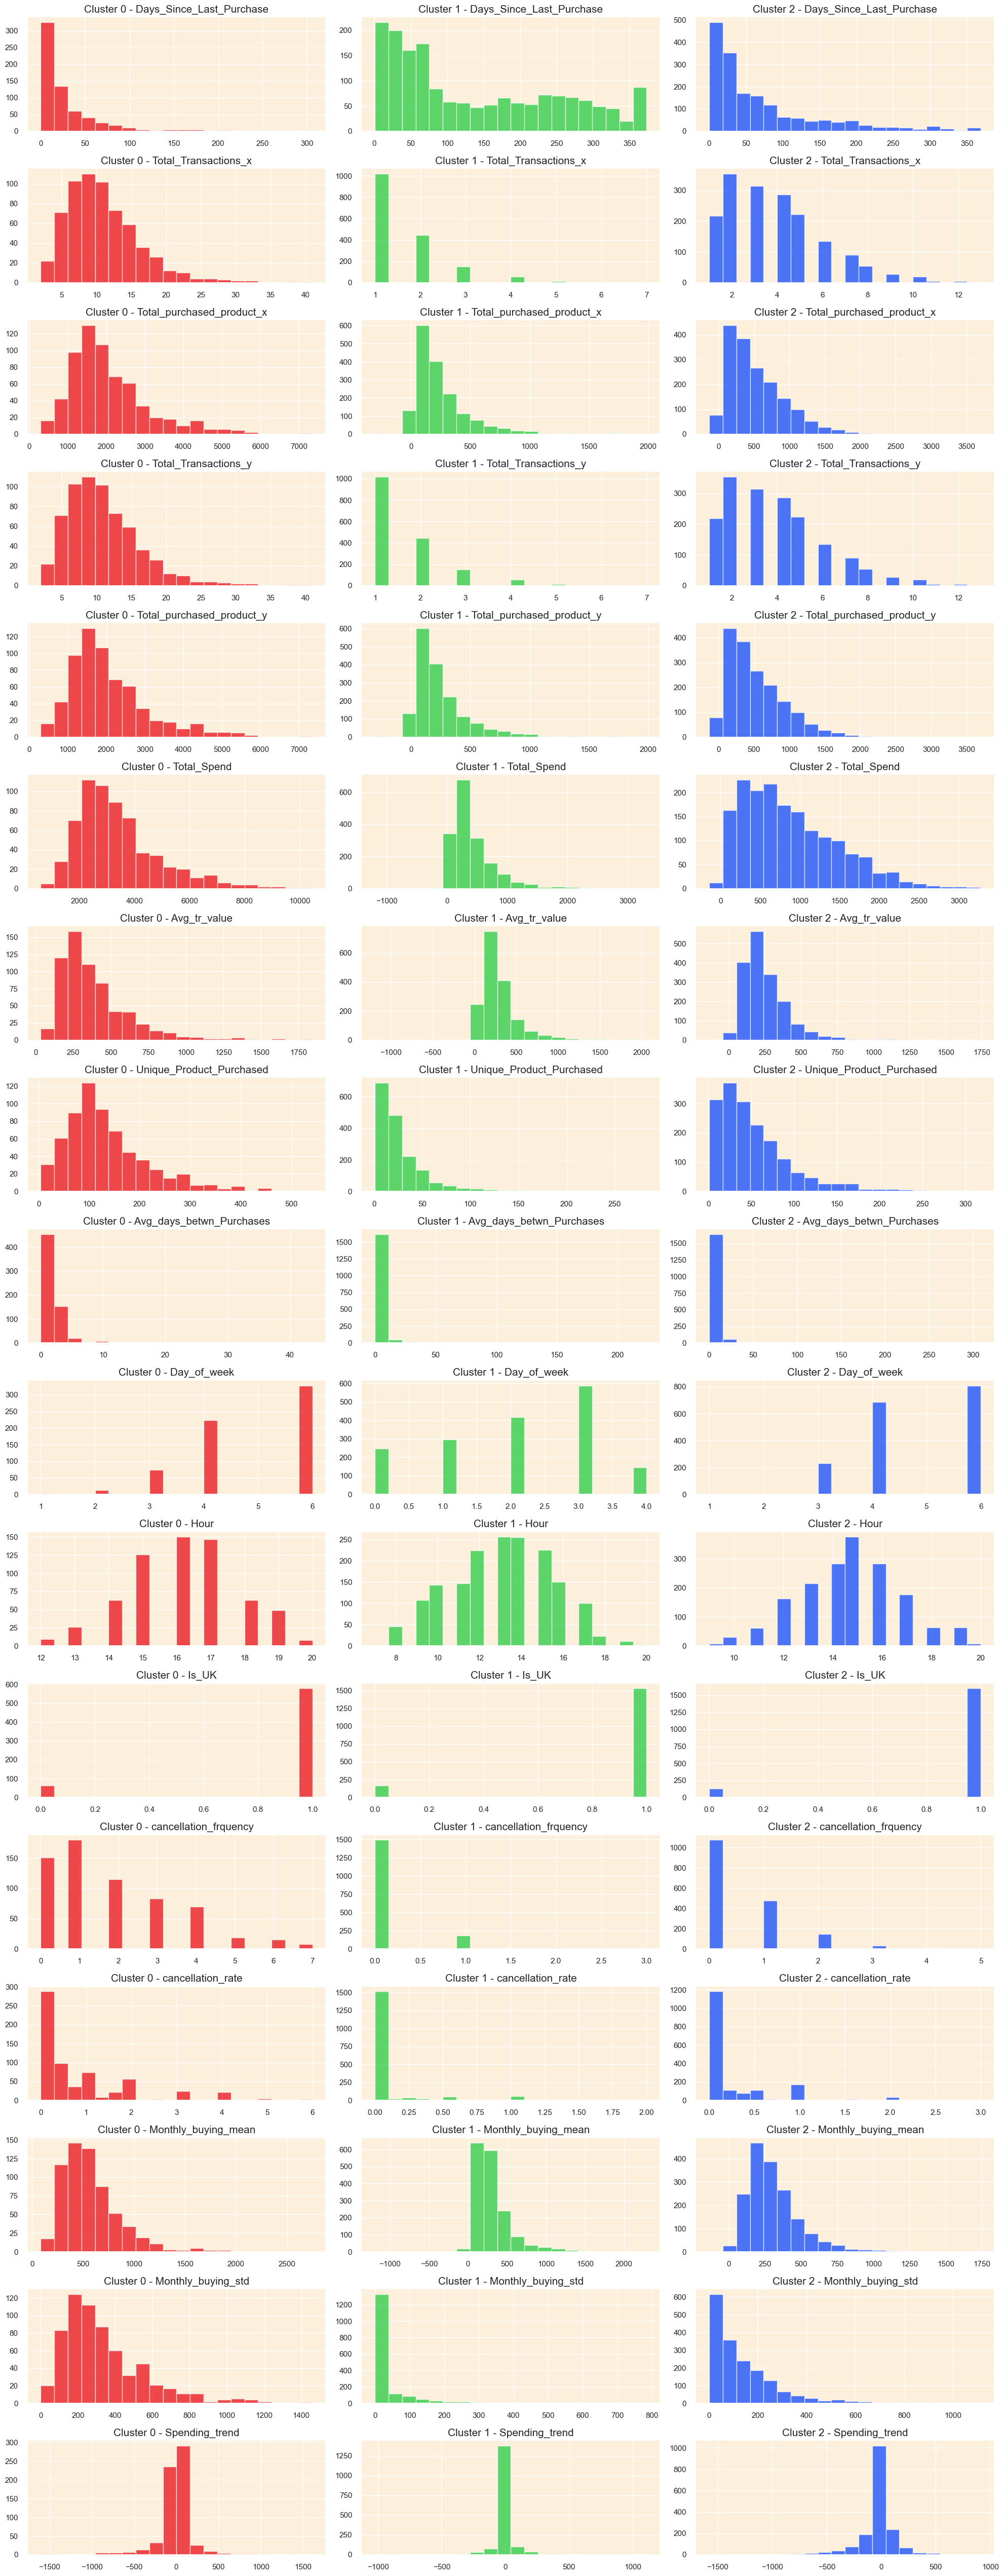

In [ ]:
# Plot histograms for each feature segmented by the clusters
features = customer_data_cleaned.columns[1:-1]
clusters = customer_data_cleaned['cluster'].unique()
clusters.sort()

# Setting up the subplots
n_rows = len(features)
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))
# Plotting histograms
for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = customer_data_cleaned[customer_data_cleaned['cluster'] == cluster][feature]
        axes[i, j].hist(data, bins=20, color=colors[j], edgecolor='w', alpha=0.7)
        axes[i, j].set_title(f'Cluster {cluster} - {feature}', fontsize=15)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')
# Adjusting layout to prevent overlapping
plt.tight_layout()
plt.show()

Rcommendation system

In the final phase of this project, I am set to develop a recommendation system to enhance the online shopping experience. This system will suggest products to customers based on the purchasing patterns prevalent in their respective clusters. Earlier in the project, during the customer data preparation stage, I isolated a small fraction (5%) of the customers identified as outliers and reserved them in a separate dataset called outliers_data.

Now, focusing on the core 95% of the customer group, I analyze the cleansed customer data to pinpoint the top-selling products within each cluster. Leveraging this information, the system will craft personalized recommendations, suggesting the top three products popular within their cluster that they have not yet purchased. This not only facilitates targeted marketing strategies but also enriches the personal shopping experience, potentially boosting sales. For the outlier group, a basic approach could be to recommend random products, as a starting point to engage them.

In [ ]:
data1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'transaction_status',
       'InvoiceDay', 'Total_Spend', 'Day_of_week', 'Hour', 'year', 'month'],
      dtype='object')

In [ ]:
# Step 1: Extract the CustomerIDs of the outliers and remove their transactions from the main dataframe
outlier_customer_ids = outlier_data['CustomerID'].astype('float').unique()
df_filtered = data1[~data1['CustomerID'].isin(outlier_customer_ids)]

# Step 2: Ensure consistent data type for CustomerID across both dataframes before merging
customer_data_cleaned['CustomerID'] = customer_data_cleaned['CustomerID'].astype('float')
# Step 3: Merge the transaction data with the customer data to get the cluster information for each transaction
merged_data = df_filtered.merge(customer_data_cleaned[['CustomerID', 'cluster']], on='CustomerID', how='inner')

# Step 4: Identify the top 10 best-selling products in each cluster based on the total quantity sold
best_selling_products = merged_data.groupby(['cluster', 'StockCode', 'Description'])['Quantity'].sum().reset_index()
best_selling_products = best_selling_products.sort_values(by=['cluster', 'Quantity'], ascending=[True, False])
top_products_per_cluster = best_selling_products.groupby('cluster').head(10)
# Step 5: Create a record of products purchased by each customer in each cluster
customer_purchases = merged_data.groupby(['CustomerID', 'cluster', 'StockCode'])['Quantity'].sum().reset_index()

# Step 6: Generate recommendations for each customer in each cluster
recommendations = []
for cluster in top_products_per_cluster['cluster'].unique():

    top_products = top_products_per_cluster[top_products_per_cluster['cluster'] == cluster]
    customers_in_cluster = customer_data_cleaned[customer_data_cleaned['cluster'] == cluster]['CustomerID']
    for customer in customers_in_cluster:

         # Identify products already purchased by the customer
         customer_purchased_products = customer_purchases[(customer_purchases['CustomerID'] == customer) &
                                                         (customer_purchases['cluster'] == cluster)]['StockCode'].tolist()

         # Find top 3 products in the best-selling list that the customer hasn't purchased yet
         top_products_not_purchased = top_products[~top_products['StockCode'].isin(customer_purchased_products)]
         top_3_products_not_purchased = top_products_not_purchased.head(3)
 # Append the recommendations to the list
         recommendations.append([customer, cluster] + top_3_products_not_purchased[['StockCode', 'Description']].values.flatten().tolist())

# Step 7: Create a dataframe from the recommendations list and merge it with the original customer data
recommendations_df = pd.DataFrame(recommendations, columns=['CustomerID', 'cluster', 'Rec1_StockCode', 'Rec1_Description', \
                                                 'Rec2_StockCode', 'Rec2_Description', 'Rec3_StockCode', 'Rec3_Description'])
customer_data_with_recommendations = customer_data_cleaned.merge(recommendations_df, on=['CustomerID', 'cluster'], how='right')

In [ ]:
# Display 10 random rows from the customer_data_with_recommendations dataframe
customer_data_with_recommendations.set_index('CustomerID').iloc[:, -6:].sample(10, random_state=0)

,Rec1_StockCode,Rec1_Description,Rec2_StockCode,Rec2_Description,Rec3_StockCode,Rec3_Description
CustomerID,,,,,,
13470.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,85099B,JUMBO BAG RED RETROSPOT,84879,ASSORTED COLOUR BIRD ORNAMENT
13453.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,85099B,JUMBO BAG RED RETROSPOT,84879,ASSORTED COLOUR BIRD ORNAMENT
14946.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84879,ASSORTED COLOUR BIRD ORNAMENT,85123A,WHITE HANGING HEART T-LIGHT HOLDER
14901.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84879,ASSORTED COLOUR BIRD ORNAMENT,85123A,WHITE HANGING HEART T-LIGHT HOLDER
12854.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,15036,ASSORTED COLOURS SILK FAN,85099B,JUMBO BAG RED RETROSPOT
17346.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84568,GIRLS ALPHABET IRON ON PATCHES,15036,ASSORTED COLOURS SILK FAN
17080.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84879,ASSORTED COLOUR BIRD ORNAMENT,85123A,WHITE HANGING HEART T-LIGHT HOLDER
15326.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,85099B,JUMBO BAG RED RETROSPOT,85123A,WHITE HANGING HEART T-LIGHT HOLDER
18129.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84879,ASSORTED COLOUR BIRD ORNAMENT,85123A,WHITE HANGING HEART T-LIGHT HOLDER
